# LHC Signal Monitoring API Package
<img src="https://gitlab.cern.ch/LHCData/lhc-sm-api/raw/master/figures/logo.png" width=25%>

This is a package with an API for signal access and processing for the LHC Signal Monitoring project.

## Installation
There are two ways of using the API in your code:

1. Loading preinstalled packages from an EOS project folder (in SWAN environment)
2. Manual installation (in any environment)

The first option guarantees the use of the most recent code version without manual installation. The second one is more time consuming, however, works in environments with no access to the EOS folder (e.g., Apache Airflow scheduler). In addition, the second method allows to install a selected version (`pip install package_name=version`).

### Preinstalled Packages
To use the set of pre-installed packages please follow these three steps:

0. Contact the Signal Monitoring team (mailto:lhc-signal-monitoring@cern.ch) in order to get read access to the EOS folder with pre-installed packages.
1. (optional) Uninstall existing packages.  
Historically, the initial way of installing the packages was by manual installation discussed in Section Manual Installation.
Thus, to avoid double reference to a package, please uninstall (with `pip uninstall package_name`) all packages needed for the API to work (tzlocal, tqdm, influxdb, plotly, lhcsmapi). This operation has to be done only once provided that the packages were installed (to check if a package was installed use `pip list | grep package_name` in SWAN Command Line Interface).
2. While logging to SWAN service, please add the environment script as `/eos/project/l/lhcsm/public/packages.sh`
<img src="https://gitlab.cern.ch/LHCData/lhc-sm-api/raw/master/figures/swan_environment_script.png" width=25%>

### Manual Installation
In order to use the API, it has to be installed with a python package installer as

```python
pip install --user lhcsmapi
```
Check the latest version at <a href="https://pypi.org/project/lhcsmapi/">https://pypi.org/project/lhcsmapi/</a>

The API relies on several external python packages which have to be installed in a similar manner. The list of packages is stored in the <u><i>requirements.txt</i></u> file.

If you use SWAN, the service provides a set of pre-installed python packages through CVMFS. The LHC-SM notebooks require installation of several additional packages on top of CVMFS. In order to install a package, please open a SWAN Terminal by clicking [>_] icon in the top right corner.

![SWAN CLI Button](https://gitlab.cern.ch/LHCData/lhc-sm-hwc/-/raw/master/figures/swan-cli-button.png)

Five additional python packages have to be installed:

- tzlocal - for time zone convertion
- tqdm - for progress bar to track queries
- plotly - for interactive plotting of circuit schematics 
- lhcsmapi - for LHC-SM API

In order to install a package please execute the following command
```
$ pip install --user package_name
```

The expected output, after installing all packages, is presented in five figures below.

- SWAN Terminal output after successful installation of tzlocal package.
![SWAN pip install tzlocal](https://gitlab.cern.ch/LHCData/lhc-sm-hwc/-/raw/master/figures/swan-pip-install-tzlocal.png)

- SWAN Terminal output after successful installation of tqdm package.
![SWAN pip install tqdm](https://gitlab.cern.ch/LHCData/lhc-sm-hwc/-/raw/master/figures/swan-pip-install-tqdm.png)

- SWAN Terminal output after successful installation of influxdb package.
![SWAN pip install influxdb](https://gitlab.cern.ch/LHCData/lhc-sm-hwc/-/raw/master/figures/swan-pip-install-influxdb.png)

- SWAN Terminal output after successful installation of plotly package.
![SWAN pip install plotly](https://gitlab.cern.ch/LHCData/lhc-sm-hwc/-/raw/master/figures/swan-pip-install-plotly.png)

- SWAN Terminal output after successful installation of lhcsmapi package.
![SWAN pip install lhcsmapi](https://gitlab.cern.ch/LHCData/lhc-sm-hwc/-/raw/master/figures/swan-pip-install-lhcsmapi.png)

### Updating lhcsmapi Package

Please note that the first four packages (tzlocal, tqdm, influxdb, plotly) have to be installed only once while the last one is still in the development phase and subject to frequent updates. Please send us an e-mail request (mailto:lhc-signal-monitoring@cern.ch) if you want to subscribe for updates. In order to update the lhcsmapi package, please execute the following command.
```
$ pip install --user --upgrade lhcsmapi
```

### Known Issues
At times, in order to update the lhcsmapi package one has to execute the command
```
pip install --user --upgrade lhcsmapi
```
twice while using the SWAN terminal (cf. an error message in the figure below).
<img src="https://gitlab.cern.ch/LHCData/lhc-sm-api/raw/master/figures/double_reinstallation_error.png">


In case this command returns an error, please try to execute it again. Should that operation also fail, please uninstall the package by executing
```
$ pip uninstall lhcsmapi
```

and performing a fresh installation the package
```
$ pip install --user lhcsmapi
```

Should you experience any further issues with installing a package, please contact <a href="https://swan.web.cern.ch">SWAN support</a> or use the preinstalled package with the environment script.

### NXCALS Access with SWAN
The API allows to perform a query of signals from PM and NXCALS. The NXCALS database requires an assignment of dedicated access rights for a user. 
If you want to query NXCALS with the API, please follow a procedure below on how to request the NXCALS access.

1. Go to http://nxcals-docs.web.cern.ch/current/user-guide/data-access/nxcals-access-request/ for most updated procedure
2. Send an e-mail to mailto:acc-logging-support@cern.ch with the following pieces of information:

 - your NICE username
 - system: WinCCOA, CMW
 - NXCALS environment: PRO
 
Optionally one can mention that the NXCALS database will be accessed through SWAN.
Once the access is granted, you can use NXCALS with SWAN.

# Time
**Time** class provides a set of methods for conversion between various time formats. In addition it provides a generator for days between given periods. Main methods are:

- `Time.to_unix_timestamp(input, unit='ns')`
- `Time.to_pandas_timestamp(input, unit='ns')`
- `Time.to_string(input, unit='ns')`
- `Time.to_datetime(input, unit='ns')`

The unit argument is optional. Its default value is 'ns', i.e., nanosecond.

- `Time.to_unix_timestamp(input, unit='ns')`

This method is useful to obtain a timestamp to query PM database

In [118]:
from lhcsmapi.Time import Time
date_time_str = "2018-05-01 00:00:00"
Time.to_unix_timestamp(date_time_str, unit="ns")

1525125600000000000

In [119]:
from lhcsmapi.Time import Time
from datetime import datetime
date_time_dt = datetime(2018, 5, 1, 0, 0, 0, 0)
Time.to_unix_timestamp(date_time_dt, unit="ns")

1525125600000000000

In [120]:
from lhcsmapi.Time import Time
timestamp = 1525125600000000000
Time.to_unix_timestamp(timestamp, unit="ns")

1525125600000000000

Any method also works without the unit. The default unit is ns.

In [121]:
from lhcsmapi.Time import Time
timestamp = 1525125600000000000
Time.to_unix_timestamp(timestamp)

1525125600000000000

In [122]:
from lhcsmapi.Time import Time
import pandas as pd
timestamp_pd = pd.Timestamp(2018, 5, 1, 0)
Time.to_unix_timestamp(timestamp_pd, unit="ns")

1525125600000000000

- `Time.to_pandas_timestamp(input, unit='ns')`

In [123]:
from lhcsmapi.Time import Time
date_time_str = "2019-07-10 10:23:27.013"
Time.to_pandas_timestamp(date_time_str, unit="ns")

Timestamp('2019-07-10 10:23:27.013000+0200', tz='Europe/Zurich')

In [124]:
from lhcsmapi.Time import Time
from datetime import datetime
date_time_dt = datetime(2019, 7, 10, 10, 23, 27, 13)
Time.to_pandas_timestamp(date_time_dt, unit="ns")

Timestamp('2019-07-10 10:23:27.000013+0200', tz='Europe/Zurich')

In [125]:
from lhcsmapi.Time import Time
timestamp = 1562747007013000000
Time.to_pandas_timestamp(timestamp, unit="ns")

Timestamp('2019-07-10 10:23:27.013000+0200', tz='Europe/Zurich')

In [126]:
from lhcsmapi.Time import Time
import pandas as pd
timestamp_pd = pd.Timestamp(2019, 7, 10, 10, 23, 27, 13000)
Time.to_pandas_timestamp(timestamp_pd, unit="ns")

Timestamp('2019-07-10 10:23:27.013000+0200', tz='Europe/Zurich')

- `Time.to_string(input, unit='ns')`

In [127]:
from lhcsmapi.Time import Time
date_time_str = "2017-07-02 01:23:27"
Time.to_string(date_time_str, unit="ns")

'2017-07-02 01:23:27+02:00'

In [128]:
from lhcsmapi.Time import Time
from datetime import datetime
date_time_dt = datetime(2017, 7, 2, 1, 23, 27, 0)
Time.to_string(date_time_dt, unit="ns")

'2017-07-02 01:23:27+02:00'

In [129]:
from lhcsmapi.Time import Time
timestamp = 1498951407000000000
Time.to_string(timestamp, unit="ns")

'2017-07-02 01:23:27+02:00'

In [130]:
from lhcsmapi.Time import Time
import pandas as pd
timestamp_pd = pd.Timestamp(2018, 5, 1, 1, 23, 27)
Time.to_string(timestamp_pd, unit="ns")

'2018-05-01 01:23:27+02:00'

There is also a version of this method returning a string without the time zone

In [131]:
from lhcsmapi.Time import Time
import pandas as pd
timestamp_pd = pd.Timestamp(2018, 5, 1, 1, 23, 27)
Time.to_string_short(timestamp_pd, unit="ns")

'2018-05-01 01:23:27'

- `Time.to_datetime(input, unit='ns')`

In [132]:
from lhcsmapi.Time import Time
date_time_str = "2019-01-02 23:59:11"
Time.to_datetime(date_time_str, unit="ns")

datetime.datetime(2019, 1, 2, 23, 59, 11, tzinfo=<DstTzInfo 'Europe/Zurich' CET+1:00:00 STD>)

In [133]:
from lhcsmapi.Time import Time
from datetime import datetime
date_time_dt = datetime(2019, 1, 2, 23, 59, 11, 0)
Time.to_datetime(date_time_dt, unit="ns")

datetime.datetime(2019, 1, 2, 23, 59, 11, tzinfo=<DstTzInfo 'Europe/Zurich' CET+1:00:00 STD>)

In [134]:
from lhcsmapi.Time import Time
timestamp = 1546469951000000000
Time.to_datetime(timestamp, unit="ns")

datetime.datetime(2019, 1, 2, 23, 59, 11, tzinfo=<DstTzInfo 'Europe/Zurich' CET+1:00:00 STD>)

In [135]:
from lhcsmapi.Time import Time
import pandas as pd
timestamp_pd = pd.Timestamp(2019, 1, 2, 23, 59, 11, 0)
Time.to_datetime(timestamp_pd, unit="ns")

datetime.datetime(2019, 1, 2, 23, 59, 11, tzinfo=<DstTzInfo 'Europe/Zurich' CET+1:00:00 STD>)

- `Time.to_unix_timestamp_in_sec(input, tz)`

In [136]:
from lhcsmapi.Time import Time
timestamp = 1426220469491000000
Time.to_unix_timestamp_in_sec(timestamp)

1426220469.4910002

- `Time.get_query_period_in_unix_time(t_start, t_end, duration, tz)`

    There are three ways of executing this method:
    - start time and end time

In [137]:
from lhcsmapi.Time import Time
time_date_start = 1426220459491000000
time_date_end = 1426220479491000000
Time.get_query_period_in_unix_time(time_date_start, time_date_end, None, tz='Europe/Zurich')

(1426220459491000000, 1426220479491000000)

   - start time, duration with a single element list to indicate end time after the start time

In [138]:
from lhcsmapi.Time import Time
time_date_start = 1426220459491000000
duration = [(20, 's')]
Time.get_query_period_in_unix_time(time_date_start, None, duration, tz='Europe/Zurich')

(1426220459491000000, 1426220479491000000)

- start time, duration with a two element list to indicate end time befor (1st element) and after (2nd element) the start time

In [139]:
from lhcsmapi.Time import Time
time_date_start = 1426220469491000000
duration =  [(10, 's'), (10, 's')]
Time.get_query_period_in_unix_time(time_date_start, None, duration, tz='Europe/Zurich')

(1426220459491000000, 1426220479491000000)

- `Time.daterange(time_date_start, time_date_end)`

Useful to iterate over days while e.g. sequentially querying PM database for events (there is a limit of 24h query duration in this case).

In [140]:
from datetime import date
time_date_start = date(2014, 1, 1)
time_date_end = date(2014, 1, 3)
for single_date in Time.daterange(time_date_start, time_date_end):
    print(single_date)

2014-01-01
2014-01-02


In case the start date is later than the end date, the generator does not return output

In [141]:
from datetime import date
time_date_start = date(2014, 1, 5)
time_date_end = date(2014, 1, 3)
for single_date in Time.daterange(time_date_start, time_date_end):
    print(single_date)

# Timer
**Timer** class provides a base functionality for measuring code execution time.

In [142]:
from lhcsmapi.Timer import Timer
t = Timer()

with Timer():
    for i in range(1000000):
        i = i+1

Elapsed: 0.165 s.


equivalent to

In [143]:
import time
t = time.time()
for i in range(1000000):
        i = i+1
time.time() - t

0.16869902610778809

# 1. Metadata
The Metadata (`lhcsmapi.metadata`) module contains methods to retrieve various signal and circuit names.  
In order to avoid storing full names and enable updating signal names based on time. A signal hierarchy is encoded with a dictionary and can be accessed through links in the table below

|Circuit type|Hyperlink|
|------------|---------|
|RB          |https://gitlab.cern.ch/LHCData/lhc-sm-api/blob/master/lhcsmapi/metadata/RB_METADATA.json|
|RQ          |https://gitlab.cern.ch/LHCData/lhc-sm-api/blob/master/lhcsmapi/metadata/RQ_METADATA.json|
|IT          |https://gitlab.cern.ch/LHCData/lhc-sm-api/blob/master/lhcsmapi/metadata/IT_METADATA.json|
|IPQ2        |https://gitlab.cern.ch/LHCData/lhc-sm-api/blob/master/lhcsmapi/metadata/IPQ2_METADATA.json|
|IPQ4        |https://gitlab.cern.ch/LHCData/lhc-sm-api/blob/master/lhcsmapi/metadata/IPQ4_METADATA.json|
|IPQ8        |https://gitlab.cern.ch/LHCData/lhc-sm-api/blob/master/lhcsmapi/metadata/IPQ8_METADATA.json|
|IPD2        |https://gitlab.cern.ch/LHCData/lhc-sm-api/blob/master/lhcsmapi/metadata/IPD2_METADATA.json|
|IPD2_B1B2   |https://gitlab.cern.ch/LHCData/lhc-sm-api/blob/master/lhcsmapi/metadata/IPD2_B1B2_METADATA.json|
|60A         |https://gitlab.cern.ch/LHCData/lhc-sm-api/blob/master/lhcsmapi/metadata/60A_METADATA.json|
|80-120A     |https://gitlab.cern.ch/LHCData/lhc-sm-api/blob/master/lhcsmapi/metadata/80-120A_METADATA.json|

### 1.1. Signal Metadata 
**SignalMetadata** class stores information about signal and circuit names as well as corresponding metadata.

- get beam mode description

In [144]:
from lhcsmapi.metadata.SignalMetadata import SignalMetadata

SignalMetadata.get_beam_mode_details()

Mode      Name                              Description
0      1    NOMODE  No mode, data is not available, not set
1      2     SETUP                                    Setup
2      3  INJPILOT                          Pilot injection
3      4   INJINTR                   Intermediate injection
4      5   INJNOMN                        Nominal injection
5      6   PRERAMP                              Before ramp
6      7      RAMP                                     Ramp
7      8   FLATTOP                                 Flat top
8      9   SQUEEZE                                  Squeeze
9     10    ADJUST                  Adjust beam on flat top
10    11    STABLE                  Stable beam for physics
11    12  UNSTABLE                            Unstable beam
12    13  BEAMDUMP                                Beam dump
13    14  RAMPDOWN                                Ramp down
14    15  RECOVERY                               Recovering
15    16   INJDUMP                          Inject and dump
16    17  CIRCDUMP                       Circulate and dump
17    18     ABORT   Recovery after a beam permit flag drop
18    19   CYCLING      Pre-cycle before injection, no beam
19    20    WBDUMP                        Warning beam dump
20    21    NOBEAM          No beam or preparation for beam

- get circuit types

In [145]:
from lhcsmapi.metadata.SignalMetadata import SignalMetadata

SignalMetadata.get_circuit_types()

['RB',
 'RQ',
 'IT',
 'IPD2_B1B2',
 'IPD2',
 'IPQ2',
 'IPQ4',
 'IPQ8',
 '600A',
 '60A',
 '80-120A']

- get circuit names

In [146]:
from lhcsmapi.metadata.SignalMetadata import SignalMetadata

SignalMetadata.get_circuit_names('RB')

['RB.A12',
 'RB.A23',
 'RB.A34',
 'RB.A45',
 'RB.A56',
 'RB.A67',
 'RB.A78',
 'RB.A81']

- get signal name for PM

In [147]:
from lhcsmapi.metadata.SignalMetadata import SignalMetadata

SignalMetadata.get_signal_name('RB', 'RB.A12', 'PC', 'PM', 'I_MEAS')

'STATUS.I_MEAS'

- get signal name for NXCALS

In [148]:
from lhcsmapi.metadata.SignalMetadata import SignalMetadata

SignalMetadata.get_signal_name('RB', 'RB.A12', 'PC', 'NXCALS', 'I_MEAS')

'I_MEAS'

- get metadata for PM

In [149]:
from lhcsmapi.metadata.SignalMetadata import SignalMetadata

SignalMetadata.get_circuit_signal_database_metadata('RB', 'RB.A12', 'PC', 'PM')

{'system': 'FGC',
 'source': 'RPTE.UA23.RB.A12',
 'className': '51_self_pmd',
 'I_REF': 'STATUS.I_REF',
 'I_MEAS': 'STATUS.I_MEAS',
 'V_REF': 'STATUS.V_REF',
 'V_MEAS': 'STATUS.V_MEAS',
 'I_EARTH': 'IEARTH.IEARTH',
 'I_EARTH_PCNT': 'STATUS.I_EARTH_PCNT',
 'I_A': 'IAB.I_A',
 'I_B': 'IAB.I_B',
 'ACTION': 'EVENTS.ACTION',
 'PROPERTY': 'EVENTS.PROPERTY',
 'SYMBOL': 'EVENTS.SYMBOL'}

- get metadata for NXCALS

In [150]:
from lhcsmapi.metadata.SignalMetadata import SignalMetadata

SignalMetadata.get_circuit_signal_database_metadata('RB', 'RB.A12', 'PC', 'NXCALS')

{'system': 'CMW',
 'device': 'RPTE.UA23.RB.A12',
 'property': 'SUB',
 'I_MEAS': 'I_MEAS',
 'I_EARTH_MA': 'I_EARTH_MA',
 'I_REF': 'I_REF',
 'I_ERR_MA': 'I_ERR_MA'}

**SignalMetadata** is parameterized with time in order to account for differences across the metadata. E.g., during LS2 there was an upgrade of RQ QPS. With the upgrade the current is also logged in PM (before it was not done; cf. error below).

In [151]:
from lhcsmapi.metadata.SignalMetadata import SignalMetadata

SignalMetadata.get_signal_name('RQ', 'RQD.A12', 'QH', 'PM', 'I_HDS', timestamp_query='2018-01-01 00:00:00')

KeyError: 'I_HDS'

In [152]:
from lhcsmapi.metadata.SignalMetadata import SignalMetadata

SignalMetadata.get_signal_name('RQ', 'RQD.A12', 'QH', 'PM', 'I_HDS', timestamp_query='2021-01-10 00:00:00')

['%CELL%:I_HDS_1', '%CELL%:I_HDS_2']

### 1.2. Mapping Metadata
Some signal names obtained with SignalMetadata functions have a wildcard in order to save space and exploit signal naming convention.  
**MappingMetadata** class stores information about circuit topology, e.g., order and names of magnets in a particular circuit.  
There is a collection of csv files containing circuit topology summarised in the table below.

|System type|Hyperlink|
|------------|---------|
|beam mode   |https://gitlab.cern.ch/LHCData/lhc-sm-api/tree/master/lhcsmapi/metadata/beam_mode|
|busbar      |https://gitlab.cern.ch/LHCData/lhc-sm-api/tree/master/lhcsmapi/metadata/busbar|
|magnet      |https://gitlab.cern.ch/LHCData/lhc-sm-api/tree/master/lhcsmapi/metadata/magnet|
|qps_crate   |https://gitlab.cern.ch/LHCData/lhc-sm-api/tree/master/lhcsmapi/metadata/qps_crate|

- QPS crate name for a magnet 

In [153]:
from lhcsmapi.metadata.MappingMetadata import MappingMetadata

MappingMetadata.get_crate_name_from_magnet_name('RB', 'MB.A16L2')

'B16L2'

- QPS crates for RB

In [154]:
from lhcsmapi.metadata.MappingMetadata import MappingMetadata

MappingMetadata.get_crates_for_circuit_names('RB', 'RB.A12')

['B8R1',
 'B9R1',
 'B10R1',
 'B11R1',
 'B12R1',
 'B13R1',
 'B14R1',
 'B15R1',
 'B16R1',
 'B17R1',
 'B18R1',
 'B19R1',
 'B20R1',
 'B21R1',
 'B22R1',
 'B23R1',
 'B24R1',
 'B25R1',
 'B26R1',
 'B27R1',
 'B28R1',
 'B29R1',
 'B30R1',
 'B31R1',
 'B32R1',
 'B33R1',
 'B34R1',
 'B34L2',
 'B33L2',
 'B32L2',
 'B31L2',
 'B30L2',
 'B29L2',
 'B28L2',
 'B27L2',
 'B26L2',
 'B25L2',
 'B24L2',
 'B23L2',
 'B22L2',
 'B21L2',
 'B20L2',
 'B19L2',
 'B18L2',
 'B17L2',
 'B16L2',
 'B15L2',
 'B14L2',
 'B13L2',
 'B12L2',
 'B11L2',
 'B10L2',
 'B9L2',
 'B8L2']

# 2. Reference
The Reference module stores information about reference signal profiles and features.

|System type|Hyperlink|
|-----------------|---------|
|Energy Extraction|https://gitlab.cern.ch/LHCData/lhc-sm-api/tree/master/lhcsmapi/reference/ee|
|Current Leads    |https://gitlab.cern.ch/LHCData/lhc-sm-api/tree/master/lhcsmapi/reference/leads|
|Power Converter  |https://gitlab.cern.ch/LHCData/lhc-sm-api/tree/master/lhcsmapi/reference/pc|
|Quench Heaters   |https://gitlab.cern.ch/LHCData/lhc-sm-api/tree/master/lhcsmapi/reference/qh|

References useful for analysis, so that we can measure deviation of signals.  
References change over time, so we need to keep track of the changes.

- Get Reference Quench Heater Discharge Timestamp

In [155]:
from lhcsmapi.reference.Reference import Reference

Reference.get_quench_heater_reference_discharge('RQ', '16L2')

1417079205409000000

- Get Reference Power Converter Timestamp

In [156]:
from lhcsmapi.reference.Reference import Reference

Reference.get_power_converter_reference_fpa('RQ', 'RQD.A12', 'fgcPm')

'2018-03-18 11:58:33.600'

- Get Reference Energy Extraction Timestamp

In [157]:
from lhcsmapi.reference.Reference import Reference

Reference.get_power_converter_reference_fpa('RQ', 'RQD.A12', 'eePm')

'2018-03-18 11:58:33.675'

- Get Reference Energy Extraction Parameters

In [158]:
from lhcsmapi.reference.Reference import Reference

Reference.read_energy_extraction_reference_features('RB', '2018-03-18 11:58:33.675')

min       max
R_odd                  0.0675    0.0825
R_even                 0.0675    0.0825
t_delay_ee_odd         0.0500    0.1500
t_delay_ee_even        0.5500    0.6500
tau_u_dump_res_odd   110.0000  130.0000
tau_u_dump_res_even  110.0000  130.0000

In [159]:
from lhcsmapi.reference.Reference import Reference

Reference.read_energy_extraction_reference_features('RQ', '2018-03-18 11:58:33.675')

min     max
R                0.005   0.010
t_delay_ee       0.085   0.115
tau_u_dump_res  25.000  35.000

# 3. pyeDSL
The pyeDSL module builds on top of metadata and reference allowing for a simplified signal query, processing, plotting, and feature engineering. It is divided into two modules: `dbsignal` (with AFT, PM, and NXCALS low-level API), `dbquery` for creation of queries with pyeDSL. In addition, there are several classes implementing an embedded Domain Specific Language in python (pyeDSL).

# 3.0. Low-Level API

We begin with an observation that there are several logging databases for the hardware used in the LHC accelerator.

First of all, for ad-hoc queries and exploration for signal hierarchy we recommend general purpose browsers:

- The new PM web browser is available at the following link: http://post-mortem-paas.web.cern.ch/
- The LabVIEW PM browser
- The new TIMBER NXCALS web browser is available at: https://timber.cern.ch/
- In order to find the mapping between CALS variables and NXCALS variable and metadata (along with the data migration status), please consult: https://ccde.cern.ch/dataBrowser/search?acwReportName=CALS-to-NXCALS%20Data%20Migration&domainName=CALS


In order to programatically query PM, CALS, or NXCALS database, a dedicated API along with parameters is required. An overview is summarised in the table below.

| &nbsp;          | PM                        | PM                                | CALS*         | CALS*            | NXCALS                             | NXCALS                                       |
|-----------------|---------------------------|-----------------------------------|--------------|------------------|------------------------------------|----------------------------------------------|
| query type      | event                     | signal                            | signal       | feature          | signal                             | feature                                      |
| input           | system, source, className | system, source, className, signal | signal       | signal, features | system, (device, property), signal | system, (device, property), signal, features |
| time definition | time range                | timestamp                         | time range   | time range       | time range                         | time range                                   |
| time unit       | ns                        | ns                                | s            | s                | ns                                 | ns                                           |
| return type     | json                      | json                              | dict of list | dict of list     | spark dataframe                    | spark dataframe                              |
| execution time  | fast                      | fast                              | can be slow  | fast             | slow                               | fast                                         |
| execution type  | serial                    | serial                            | serial       | ?                | serial                             | parallel                                     |
| use             | simple                    | simple                            | simple       | simple           | simple                             | requires good knowledge of spark             |


\*CALS was used during Run1 and Run2 to log accelerator data. It was replaced by NXCALS as of HWC 2021.

The DbSignal provides a unified access to PM, CALS, and NXCALS databases in order to return a common data format, a pandas DataFrame. This enables a more advanced signal processing capabilities. The DbSignal module uses native API for each database:
- PM REST API: http://pm-api-pro/
- NXCALS python API: http://nxcals-docs.web.cern.ch/0.4.11/

Furthermore, we support Accelerator Fault Tracking (AFT) database.

### 3.0.1. Low-level PM signal query

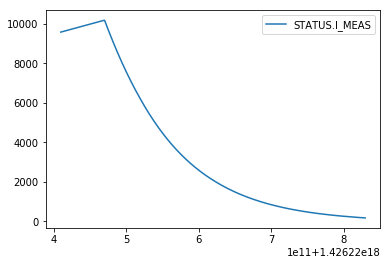

In [3]:
import requests
import json
import pandas as pd

response = requests.get('http://pm-api-pro/v2/pmdata/signal?system=FGC&className=51_self_pmd&source=RPTE.UA47.RB.A45&timestampInNanos=1426220469520000000&signal=STATUS.I_MEAS')
json_response = json.loads(response.text)

name = json_response['content'][0]['namesAndValues'][0]['name']
time = json_response['content'][0]['namesAndValues'][1]['value']
value = json_response['content'][0]['namesAndValues'][0]['value']

pd.DataFrame(value, time, [name]).plot()

### 3.0.2. Low-level NXCALS signal query

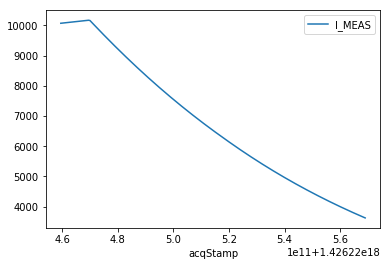

In [4]:
from cern.nxcals.pyquery.builders import *
import pandas as pd

i_meas_df = DevicePropertyQuery.builder(spark).system('CMW') \
    .startTime(pd.Timestamp('2015-03-13T04:20:59.491000000').to_datetime64())\
    .endTime(pd.Timestamp('2015-03-13T04:22:49.491000000')) \
    .entity().device('RPTE.UA47.RB.A45').property('SUB') \
    .buildDataset().select('acqStamp', 'I_MEAS').dropna().sort("acqStamp").toPandas()

i_meas_df.set_index(i_meas_df['acqStamp'], inplace=True)
i_meas_df.drop(columns='acqStamp', inplace=True)
i_meas_df.plot()

### 3.0.3. Low-level AFT context and fault query

In [5]:
import pandas as pd
import requests
import getpass

In [7]:
user = 'mmacieje'
password = getpass.getpass('Type your NICE password: ')

# we start sessions
session = requests.Session()
 
# we authenticate to get token
authentication = session.post('https://aft.cern.ch/api/acw/login', json={'login': user, 'password': password}, verify=False)
 
# request status
print(authentication.status_code)
 
# list of cookies - contains ACW token
print(authentication.cookies.get_dict())

Type your NICE password: ········


/cvmfs/sft.cern.ch/lcg/views/LCG_95apython3_nxcals/x86_64-centos7-gcc7-opt/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/cvmfs/sft.cern.ch/lcg/views/LCG_95apython3_nxcals/x86_64-centos7-gcc7-opt/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


200
{'JSESSIONID': '1DF95351C1B574C856A9A6224187580A'}


1. `/api/public/v1/accelerators`

Retrieve all available accelerators

In [8]:
accelerators = session.get('https://aft.cern.ch/api/public/v1/accelerators', verify=False)
pd.DataFrame(accelerators.json())

/cvmfs/sft.cern.ch/lcg/views/LCG_95apython3_nxcals/x86_64-centos7-gcc7-opt/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


id            name
0       ISO_HRS      ISOLDE HRS
1        LINAC4          LINAC4
2         CLEAR           CLEAR
3          LEIR            LEIR
4       ISO_GPS      ISOLDE GPS
5           SPS             SPS
6        LINAC2          LINAC2
7            AD              AD
8         ELENA           ELENA
9        LINAC3          LINAC3
10           PS              PS
11          PSB             PSB
12          LHC             LHC
13  ISO_REX_HIE  ISOLDE REX-HIE

2. `/api/public/v1/accelerators/{acceleratorId}/properties`

Retrieve the properties which are specific to the given accelerator.

In [9]:
accelerators_lhc = session.get('https://aft.cern.ch/api/public/v1/accelerators/%s/properties' % 'LHC', verify=False)
pd.DataFrame(accelerators_lhc.json())

/cvmfs/sft.cern.ch/lcg/views/LCG_95apython3_nxcals/x86_64-centos7-gcc7-opt/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


group      id                    name pattern  \
0   LHC Fault Context  303161               Beam Mode    None   
1   LHC Fault Context  303160        Operational Mode    None   
2              Impact  193273      Prevents Injection    None   
3          R2E Status  266828              R2E Status    None   
4   LHC Fault Context  303158        Accelerator Mode    None   
5   LHC Fault Context  303163       Time in Fill (ms)    None   
6   LHC Fault Context  303166        Injection Scheme    None   
7   LHC Fault Context  303164       Time in Beam Mode    None   
8              Impact  193272         Precycle Needed    None   
9   LHC Fault Context  303159                 Fill No    None   
10             Impact  193271               RP Needed    None   
11  LHC Fault Context  303165  Time in Beam Mode (ms)    None   
12  LHC Fault Context  303162            Time in Fill    None   

                                               values  
0                                                  []  
1                                                  []  
2                                           [No, Yes]  
3   [R2E_CANDIDATE, NOT_R2E_RELATED, R2E_REJECTED,...  
4                                                  []  
5                                                  []  
6                                                  []  
7                                                  []  
8                                           [No, Yes]  
9                                                  []  
10                                          [No, Yes]  
11                                                 []  
12                                                 []

3. `/api/public/v1/accelerators/{acceleratorId}/systems`

Retrieve the systems of the given accelerator.

In [10]:
accelerators_lhc = session.get('https://aft.cern.ch/api/public/v1/accelerators/%s/systems' % 'LHC', verify=False)
pd.DataFrame(accelerators_lhc.json())

/cvmfs/sft.cern.ch/lcg/views/LCG_95apython3_nxcals/x86_64-centos7-gcc7-opt/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


children     id  \
0   [{'id': 31395, 'name': 'Access Infrastructure ...  83803   
1   [{'id': 371383, 'name': 'Machine Interlock Sys...     14   
2                                                  []  16739   
3   [{'id': 68, 'name': 'Cryogenics » Equipment', ...     16   
4   [{'id': 30655, 'name': 'LBDS » TCDQ', 'childre...     10   
5   [{'id': 55, 'name': 'Collimation » Interlocks ...     13   
6   [{'id': 89, 'name': 'Transverse Damper » Contr...     21   
7   [{'id': 31171, 'name': 'Cooling and Ventilatio...  83789   
8   [{'id': 86, 'name': 'Radio Frequency » Hardwar...     20   
9   [{'id': 106, 'name': 'SIS » Controls', 'childr...     26   
10  [{'id': 107, 'name': 'QPS » Controller', 'chil...     27   
11  [{'id': 79, 'name': 'Beam Injection » Oscillat...     18   
12  [{'id': 29456, 'name': 'Beam Exciters » Apertu...  29453   
13  [{'id': 21232, 'name': 'Injection Systems » MK...  21231   
14  [{'id': 66, 'name': 'Accelerator Controls » CM...     15   
15  [{'id': 45, 'name': 'Beam Losses » Other', 'ch...     11   
16  [{'id': 47, 'name': 'Beam Instrumentation » BP...     12   
17  [{'id': 31267, 'name': 'Electrical Network » B...  83823   
18  [{'id': 84, 'name': 'Operation » Operational e...     19   
19  [{'id': 73, 'name': 'Experiments » ATLAS', 'ch...     17   
20                                                 []  83801   
21  [{'id': 101, 'name': 'Injector Complex » Beam ...     24   
22  [{'id': 21228, 'name': 'Magnet circuits » Eart...  16738   
23  [{'id': 32132, 'name': 'IT Services » Network'...  32124   
24                                                 []     29   
25  [{'id': 31, 'name': 'Access System » Controls'...      9   
26  [{'id': 95, 'name': 'Orbit » Reference', 'chil...     22   
27                                                 []     28   
28  [{'id': 29452, 'name': 'Access Management » Ac...  29449   
29  [{'id': 103, 'name': 'Vacuum » Hardware', 'chi...     25   

                         name  
0       Access Infrastructure  
1   Machine Interlock Systems  
2         Beam-induced Quench  
3                  Cryogenics  
4                        LBDS  
5                 Collimation  
6           Transverse Damper  
7     Cooling and Ventilation  
8             Radio Frequency  
9                         SIS  
10                        QPS  
11             Beam Injection  
12              Beam Exciters  
13          Injection Systems  
14       Accelerator Controls  
15                Beam Losses  
16       Beam Instrumentation  
17         Electrical Network  
18                  Operation  
19                Experiments  
20          Ventilation Doors  
21           Injector Complex  
22            Magnet circuits  
23                IT Services  
24                      Other  
25              Access System  
26                      Orbit  
27           Power Converters  
28          Access Management  
29                     Vacuum

4. `/api/public/v1/faults`

Search for faults fulfilling the given criteria.

In [11]:
params = {'acceleratorId': 'LHC', 
          'accessNeeded': True, 
          'startTime': '2016-01-13T00:00:00Z', 
          'endTime': '2016-05-13T00:00:00Z'}
pd.DataFrame(session.get(url='https://aft.cern.ch/api/public/v1/faults?', params=params).json())

/cvmfs/sft.cern.ch/lcg/views/LCG_95apython3_nxcals/x86_64-centos7-gcc7-opt/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


acceleratorName                       acceleratorPropertyInstances  \
0              LHC  [{'propertyName': 'Time in Fill', 'value': '02...   
1              LHC  [{'propertyName': 'Injection Scheme', 'value':...   
2              LHC  [{'propertyName': 'Time in Beam Mode (ms)', 'v...   
3              LHC  [{'propertyName': 'Fill No', 'value': '4885'},...   
4              LHC  [{'propertyName': 'Accelerator Mode', 'value':...   
5              LHC  [{'propertyName': 'Beam Mode', 'value': 'INJPR...   
6              LHC  [{'propertyName': 'Beam Mode', 'value': 'INJPR...   
7              LHC  [{'propertyName': 'Time in Fill', 'value': '05...   
8              LHC  [{'propertyName': 'Time in Beam Mode', 'value'...   
9              LHC  [{'propertyName': 'Time in Beam Mode', 'value'...   
10             LHC  [{'propertyName': 'Time in Beam Mode', 'value'...   
11             LHC  [{'propertyName': 'Operational Mode', 'value':...   
12             LHC  [{'propertyName': 'Accelerator Mode', 'value':...   
13             LHC  [{'propertyName': 'Beam Mode', 'value': 'SQUEE...   
14             LHC  [{'propertyName': 'Injection Scheme', 'value':...   
15             LHC  [{'propertyName': 'Injection Scheme', 'value':...   

    accessNeeded                                        description  \
0          False  access sectors 4,5,6,7 and LHCb indicate "blue...   
1          False                  electrical problem on switchboard   
2          False  Ventilation doors in IP7, they do not close, n...   
3          False                           RQT13.R7B1 water problem   
4          False                                               None   
5          False                                               None   
6          False                                               None   
7          False                              cannot close door R74   
8          False                            opened while in beam ON   
9          False  The door opened because the closing mechanism ...   
10         False                                               None   
11         False                                               None   
12         False  RCBYV4.R1B1: Vin DC over voltage\nRQ7.R1 (AC f...   
13         False  RB.A34 warm cable cooling (interlock on water ...   
14         False                                               None   
15         False                      broken cable on thermo switch   

   displayLabel  duration  effectiveDuration               endTime  \
0          None   4890000            4890000  2016-05-12T16:06:12Z   
1          None  10123000           10123000  2016-05-12T15:10:42Z   
2          None   3011000            3011000  2016-05-06T13:23:42Z   
3          None  18288000           18288000  2016-05-06T12:33:31Z   
4          None  12347000           12347000  2016-05-06T07:28:43Z   
5          None   9298000            9298000  2016-05-05T20:15:30Z   
6          None   3817000            3817000  2016-05-05T15:39:44Z   
7          None   6114000            6114000  2016-05-05T09:52:50Z   
8          None  16471000           16471000  2016-04-26T13:39:48Z   
9          None   5433000            5433000  2016-04-12T07:57:09Z   
10         None   3091000            3091000  2016-04-08T09:07:23Z   
11         None     80000              80000  2016-04-07T16:04:39Z   
12         None  14998000           14998000  2016-04-01T05:16:05Z   
13         None   7654000            7654000  2016-03-30T22:44:40Z   
14         None  17483000           17483000  2016-03-28T08:00:42Z   
15         None  10820000           10820000  2016-03-25T19:00:15Z   

                                   faultyElementNames     id labelNames  \
0                                      [patrols lost]  26594     [TIOC]   
1                                          [RQ9.L2B1]  26599     [TIOC]   
2                          [Ventilation doors in IP7]  26462     [TIOC]   
3                 [RQT13.R7B1, RPMBA.RR77.RQT13.R7B1]  26459  

5. `/api/public/v1/faults/{faultId}`

Retrieve one particular fault.

In [12]:
faults_id = session.get('https://aft.cern.ch/api/public/v1/faults/%d' % 26594, verify=False)
faults_id.json()

/cvmfs/sft.cern.ch/lcg/views/LCG_95apython3_nxcals/x86_64-centos7-gcc7-opt/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'id': 26594,
 'acceleratorName': 'LHC',
 'systemName': 'Access System » Hardware',
 'startTime': '2016-05-12T14:44:42Z',
 'endTime': '2016-05-12T16:06:12Z',
 'duration': 4890000,
 'effectiveDuration': 4890000,
 'description': 'access sectors 4,5,6,7 and LHCb indicate "blue" door statuses and have lost patrol',
 'displayLabel': None,
 'stateChanges': [{'stateId': 'BLOCKING_OP', 'time': '2016-05-12T14:44:42Z'},
  {'stateId': 'OP_ENDED', 'time': '2016-05-12T16:06:12Z'}],
 'accessNeeded': True,
 'reviewedByAwg': True,
 'reviewedByExpert': True,
 'labelNames': ['TIOC'],
 'parentId': None,
 'parentSystemName': None,
 'systemPropertyInstances': [],
 'acceleratorPropertyInstances': [{'propertyName': 'Time in Fill',
   'value': '02h 13min 44s'},
  {'propertyName': 'Injection Scheme',
   'value': '2nominals_10pilots_RomanPot_Alignment'},
  {'propertyName': 'Accelerator Mode', 'value': 'Proton Physics'},
  {'propertyName': 'R2E Status', 'value': 'NOT_R2E_RELATED'},
  {'propertyName': 'Fill No', 

6. `/api/public/v1/faults/labels`

Retrieve all labels attached to any fault.

In [13]:
faults_labels = session.get('https://aft.cern.ch/api/public/v1/faults/labels', verify=False)
pd.DataFrame(faults_labels.json())

/cvmfs/sft.cern.ch/lcg/views/LCG_95apython3_nxcals/x86_64-centos7-gcc7-opt/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


id                                    name
0   152937                     60A BPM Interaction
1   302613                                      T4
2    83888                                    TIOC
3   284995                           Access PS/PSB
4   372881                                     LBE
5   262457                                     PSU
6   370386  klystron instability + modulator fault
7   255578                       AWG Notable Fault
8   372879                            Power supply
9   189853                       BLM Sanity Checks
10  302604                                    LEIR
11  189865                              False Dump
12  114933                                  TE-EPC
13  372379                             Major Event
14  260311                                   SR7.C
15  248740                                 PIC PLC
16  256924                                    Ions
17  259150                                   BLETC
18  281492                      pole-phase winding
19  302618                                    frev
20  152921                       MPE-EPC Interface
21  260308                                     SEM
22  249289                             human error
23  358893                                   BLECF
24   87033                             Septum down
25  259163                            SR5.L.CD11.B
26  302607                                  CPS RF
27  302570                       Flowmeter problem
28  302592                                  LINAC3
29  302599                                  source
30  372381          Major Machine Protection Event
31  300628                                     REX
32  289715                       RFQ RF protection
33  372877                                Ion pump
34  191632                         MENA-20 (BE-CO)
35  376535                      TAILCLIPPER TIMING

7. `/api/public/v1/faults/states`

Retrieve all possible states a fault can be in.

In [14]:
faults_states = session.get('https://aft.cern.ch/api/public/v1/faults/states', verify=False)
pd.DataFrame(faults_states.json())

/cvmfs/sft.cern.ch/lcg/views/LCG_95apython3_nxcals/x86_64-centos7-gcc7-opt/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


id                 name
0      NON_BLOCKING_OP      Non-Blocking OP
1            CANCELLED            Cancelled
2           UNDERSTOOD           Understood
3            SUSPENDED            Suspended
4  SYSTEM_EXPERT_ENDED  System Expert Ended
5             OP_ENDED             OP Ended
6          BLOCKING_OP          Blocking OP

8. `/api/public/v1/faulty-element-types`

Retrieve all faulty element types in use in AFT.

In [15]:
fault_element_types = session.get('https://aft.cern.ch/api/public/v1/faulty-element-types', verify=False)
pd.DataFrame(fault_element_types.json())

/cvmfs/sft.cern.ch/lcg/views/LCG_95apython3_nxcals/x86_64-centos7-gcc7-opt/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


name
0                         PXACC40
1                         PXRKDIO
2                         HCTCSG_
3            L4LAINTLKSRC v.3.1.1
4                      PXBTVBM004
5                         HCRPZES
6                         HCRPZEQ
7                         HCTCDIV
8                         HCRPZEO
9                      PXLMK__003
10                         RCBV33
11                        PXRK___
12                           RNFH
13                        HCCFI__
14                        HCRPZEG
15                        HCRPZEH
16                         RCBV31
17                        HCRPZEF
18                     HCBVCRA001
19                        HCRPZEB
20                        PXACH__
21                            RAC
22                     PXDHZ__8AF
23                        PXKHZ__
24                        HCETH__
25   MKController_Virtual v.0.1.0
26                   LEBT v.2.0.4
27                         RCBV27
28                     PXMCVEBHWC
29                            RAR
..                            ...
407                       HCTCL__
408                    PXDVT__00T
409                    HCLY___129
410                    HCLY___005
411                 LTIM v.4.1.13
412                    HCRS___033
413                       PXSTP__
414                         RQT12
415                       HCEAV__
416                       PXCK___
417                         RQT13
418                          RBIV
419                          RSMV
420                        RDHZPS
421                    PXMQNFA4WP
422                    PVPUMP v.0
423                    PXMCXBBWAP
424                 LHC HALF-CELL
425                       HCCFP__
426       GENERAL UNDG CIVIL WORK
427          PreChopperL4 v.4.5.7
428                    PXMONDAFWP
429                          RQIF
430                          RSMH
431                    PXMBHGC4WP
432                          RQID
433                       HCRPHGC
434                       HCDQQDC
435                       HCRPHGA
436                       HCRPHGB

[437 rows x 1 columns]

9. `/api/public/v1/faulty-elements`

Retrieve all faulty elements in use in AFT. The results are paginated.

In [16]:
params = {'label': 'QPS', 'page': 0, 'size': 10}
faulty_elements = session.get("https://aft.cern.ch/api/public/v1/faulty-elements?", params=params, verify=False)
pd.DataFrame(faulty_elements.json())

/cvmfs/sft.cern.ch/lcg/views/LCG_95apython3_nxcals/x86_64-centos7-gcc7-opt/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


id                                            name    source
0  164878                Circuit breaker in a QPS element  ELOGBOOK
1  165063  Comm lost with QPS controller RS[DF]2.A81B[12]  ELOGBOOK
2  161929                      600A QPS reset not working  ELOGBOOK
3  163583                              Cannot get QPS_OK   ELOGBOOK
4  163188                              IPQs QPS detection  ELOGBOOK
5  161874                                      B27L5 nQPS  ELOGBOOK
6  161018                           B32R7 nQPS controller  ELOGBOOK
7  162457                     Circuit braker for QPS rack  ELOGBOOK
8  165620                                  EE QPS RQD.A12  ELOGBOOK
9  162518           Access in S78 for QPS disjuntor reset  ELOGBOOK

10. `/api/public/v1/faulty-elements/{faultyElementId}/statistics`

Retrieve faulty element statistics from AFT.

In [17]:
faulty_elements_statistics = session.get("https://aft.cern.ch/api/public/v1/faulty-elements/%d/statistics" % 163188, verify=False)
pd.DataFrame(faulty_elements_statistics.json(), index=[163188])

/cvmfs/sft.cern.ch/lcg/views/LCG_95apython3_nxcals/x86_64-centos7-gcc7-opt/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


id  faultCount  faultDuration
163188  163188           1        2065000

11. `/api/public/v1/systems/{systemId}/properties`

Retrieve the properties which are specific to the given system.

In [18]:
faulty_elements_statistics = session.get("https://aft.cern.ch/api/public/v1/systems/%d/properties" % 83823, verify=False)
pd.DataFrame(faulty_elements_statistics.json())

/cvmfs/sft.cern.ch/lcg/views/LCG_95apython3_nxcals/x86_64-centos7-gcc7-opt/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


id                  name               pattern  \
0  166765         TI Fault Type                  None   
1  358702                 Cause                  None   
2  302969   Voltage Dip % (RTE)  [-+]?[0-9]*\.?[0-9]*   
3  302967     Duration ms (RTE)  [-+]?[0-9]*\.?[0-9]*   
4  166766     TI Major Event Id           [1-9][0-9]*   
5  358703       Origin Location                  None   
6  302968    Duration ms (CERN)  [-+]?[0-9]*\.?[0-9]*   
7  302970  Voltage Dip % (CERN)  [-+]?[0-9]*\.?[0-9]*   

                                              values  
0  [Cable, Fuse, PLC Hardware, Relay, Wrong Actio...  
1  [Wind, Pollution, Snow, Unknown, Wildlife, Sho...  
2                                                 []  
3                                                 []  
4                                                 []  
5  [Grande Ile - Le Cheylas, Albertville - Coche ...  
6                                                 []  
7                                                 []

## 3.1. DbRequest
### 3.1.1. PmDbRequest
**PmDbRequest** class encapsulates PM database queries in order to simplify the query creation as well as browsing of PM events for a given period.

- Expected Success Response

In [19]:
from lhcsmapi.pyedsl.dbsignal.post_mortem.PmDbRequest import PmDbRequest
source = 'RPTE.UA47.RB.A45'
system = 'FGC'
className = '51_self_pmd'
t_start = '2015-03-13 05:20:59.4910002'
duration = [(100, 's'), (100, 's')]
PmDbRequest.find_events(source=source, system=system, className=className, t_start=t_start, duration=duration)

[('RPTE.UA47.RB.A45', 1426220469520000000)]

Source can be also replaced with a wildcard '*' in order to retrieve all sources for a given system, className, and duration.

In [20]:
from lhcsmapi.pyedsl.dbsignal.post_mortem.PmDbRequest import PmDbRequest
source = "*"
system = "QPS"
className = "DQAMCNMB_PMHSU"
ts_start = 1426201200000000000
event_duration_in_sec = 24*60*60 # 1 day is the maximum duration for a single query

PmDbRequest.find_events(source, system, className, t_start=ts_start, duration=[(event_duration_in_sec, 's')])

[('B20L5', 1426220469491000000),
 ('C20L5', 1426220517100000000),
 ('A20L5', 1426220518112000000),
 ('A21L5', 1426220625990000000),
 ('B21L5', 1426220866112000000),
 ('C23L4', 1426236802332000000),
 ('B23L4', 1426236839404000000),
 ('A23L4', 1426236839832000000),
 ('C22L4', 1426236949841000000),
 ('C15R4', 1426251285711000000),
 ('B15R4', 1426251337747000000),
 ('A15R4', 1426251388741000000),
 ('B34L8', 1426258716281000000),
 ('C34L8', 1426258747672000000),
 ('A34L8', 1426258747370000000),
 ('C33L8', 1426258835955000000),
 ('C34R7', 1426258853947000000),
 ('A34R7', 1426258854113000000),
 ('A20R3', 1426267931956000000),
 ('B20R3', 1426267983579000000),
 ('C20R3', 1426268004144000000),
 ('B18L5', 1426277626360000000),
 ('A18L5', 1426277679838000000),
 ('C18L5', 1426277680496000000),
 ('A19L5', 1426277903449000000)]

- Expected Response with no data or wrong input

In [21]:
from lhcsmapi.pyedsl.dbsignal.post_mortem.PmDbRequest import PmDbRequest
source = "*"
system = "QPS"
className = "DQAMCNMB_PMHSU"
ts_start = 1426201200000000000
event_duration_in_sec = 1

PmDbRequest.find_events(source, system, className, t_start=ts_start, duration=[(event_duration_in_sec, 's')])

[]

### 3.1.2. AftDbRequest

In [22]:
from lhcsmapi.pyedsl.dbsignal.aft.AftDbRequest import AftDbRequest

1. `/api/public/v1/accelerators`

Retrieve all available accelerators.

In [23]:
AftDbRequest(session).context_query('accelerators')

/cvmfs/sft.cern.ch/lcg/views/LCG_95apython3_nxcals/x86_64-centos7-gcc7-opt/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


id            name
0       ISO_HRS      ISOLDE HRS
1        LINAC4          LINAC4
2         CLEAR           CLEAR
3          LEIR            LEIR
4       ISO_GPS      ISOLDE GPS
5           SPS             SPS
6        LINAC2          LINAC2
7            AD              AD
8         ELENA           ELENA
9        LINAC3          LINAC3
10           PS              PS
11          PSB             PSB
12          LHC             LHC
13  ISO_REX_HIE  ISOLDE REX-HIE

2. `/api/public/v1/accelerators/{acceleratorId}/properties`

Retrieve the properties which are specific to the given accelerator.

In [24]:
AftDbRequest(session).context_query('accelerators/{acceleratorId}/properties', context_id='LHC')

/cvmfs/sft.cern.ch/lcg/views/LCG_95apython3_nxcals/x86_64-centos7-gcc7-opt/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


group      id                    name pattern  \
0   LHC Fault Context  303161               Beam Mode    None   
1   LHC Fault Context  303160        Operational Mode    None   
2              Impact  193273      Prevents Injection    None   
3          R2E Status  266828              R2E Status    None   
4   LHC Fault Context  303158        Accelerator Mode    None   
5   LHC Fault Context  303163       Time in Fill (ms)    None   
6   LHC Fault Context  303166        Injection Scheme    None   
7   LHC Fault Context  303164       Time in Beam Mode    None   
8              Impact  193272         Precycle Needed    None   
9   LHC Fault Context  303159                 Fill No    None   
10             Impact  193271               RP Needed    None   
11  LHC Fault Context  303165  Time in Beam Mode (ms)    None   
12  LHC Fault Context  303162            Time in Fill    None   

                                               values  
0                                                  []  
1                                                  []  
2                                           [No, Yes]  
3   [R2E_CANDIDATE, NOT_R2E_RELATED, R2E_REJECTED,...  
4                                                  []  
5                                                  []  
6                                                  []  
7                                                  []  
8                                           [No, Yes]  
9                                                  []  
10                                          [No, Yes]  
11                                                 []  
12                                                 []

3. `/api/public/v1/accelerators/{acceleratorId}/systems`

Retrieve the systems of the given accelerator.

In [25]:
AftDbRequest(session).context_query('accelerators/{acceleratorId}/systems', context_id='LHC')

/cvmfs/sft.cern.ch/lcg/views/LCG_95apython3_nxcals/x86_64-centos7-gcc7-opt/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


children     id  \
0   [{'id': 31395, 'name': 'Access Infrastructure ...  83803   
1   [{'id': 371383, 'name': 'Machine Interlock Sys...     14   
2                                                  []  16739   
3   [{'id': 68, 'name': 'Cryogenics » Equipment', ...     16   
4   [{'id': 30655, 'name': 'LBDS » TCDQ', 'childre...     10   
5   [{'id': 55, 'name': 'Collimation » Interlocks ...     13   
6   [{'id': 89, 'name': 'Transverse Damper » Contr...     21   
7   [{'id': 31171, 'name': 'Cooling and Ventilatio...  83789   
8   [{'id': 86, 'name': 'Radio Frequency » Hardwar...     20   
9   [{'id': 106, 'name': 'SIS » Controls', 'childr...     26   
10  [{'id': 107, 'name': 'QPS » Controller', 'chil...     27   
11  [{'id': 79, 'name': 'Beam Injection » Oscillat...     18   
12  [{'id': 29456, 'name': 'Beam Exciters » Apertu...  29453   
13  [{'id': 21232, 'name': 'Injection Systems » MK...  21231   
14  [{'id': 66, 'name': 'Accelerator Controls » CM...     15   
15  [{'id': 45, 'name': 'Beam Losses » Other', 'ch...     11   
16  [{'id': 47, 'name': 'Beam Instrumentation » BP...     12   
17  [{'id': 31267, 'name': 'Electrical Network » B...  83823   
18  [{'id': 84, 'name': 'Operation » Operational e...     19   
19  [{'id': 73, 'name': 'Experiments » ATLAS', 'ch...     17   
20                                                 []  83801   
21  [{'id': 101, 'name': 'Injector Complex » Beam ...     24   
22  [{'id': 21228, 'name': 'Magnet circuits » Eart...  16738   
23  [{'id': 32132, 'name': 'IT Services » Network'...  32124   
24                                                 []     29   
25  [{'id': 31, 'name': 'Access System » Controls'...      9   
26  [{'id': 95, 'name': 'Orbit » Reference', 'chil...     22   
27                                                 []     28   
28  [{'id': 29452, 'name': 'Access Management » Ac...  29449   
29  [{'id': 103, 'name': 'Vacuum » Hardware', 'chi...     25   

                         name  
0       Access Infrastructure  
1   Machine Interlock Systems  
2         Beam-induced Quench  
3                  Cryogenics  
4                        LBDS  
5                 Collimation  
6           Transverse Damper  
7     Cooling and Ventilation  
8             Radio Frequency  
9                         SIS  
10                        QPS  
11             Beam Injection  
12              Beam Exciters  
13          Injection Systems  
14       Accelerator Controls  
15                Beam Losses  
16       Beam Instrumentation  
17         Electrical Network  
18                  Operation  
19                Experiments  
20          Ventilation Doors  
21           Injector Complex  
22            Magnet circuits  
23                IT Services  
24                      Other  
25              Access System  
26                      Orbit  
27           Power Converters  
28          Access Management  
29                     Vacuum

4. `/api/public/v1/faults`

Search for faults fulfilling the given criteria.

In [26]:
AftDbRequest(session).fault_query(t_start='2016-01-13T00:00:00Z', t_end='2016-05-13T00:00:00Z', acceleratorId='LHC', accessNeeded=True)

/cvmfs/sft.cern.ch/lcg/views/LCG_95apython3_nxcals/x86_64-centos7-gcc7-opt/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


acceleratorName                       acceleratorPropertyInstances  \
0              LHC  [{'propertyName': 'Time in Fill', 'value': '02...   
1              LHC  [{'propertyName': 'Injection Scheme', 'value':...   
2              LHC  [{'propertyName': 'Time in Beam Mode (ms)', 'v...   
3              LHC  [{'propertyName': 'Fill No', 'value': '4885'},...   
4              LHC  [{'propertyName': 'Accelerator Mode', 'value':...   
5              LHC  [{'propertyName': 'Beam Mode', 'value': 'INJPR...   
6              LHC  [{'propertyName': 'Beam Mode', 'value': 'INJPR...   
7              LHC  [{'propertyName': 'Time in Fill', 'value': '05...   
8              LHC  [{'propertyName': 'Time in Beam Mode', 'value'...   
9              LHC  [{'propertyName': 'Time in Beam Mode', 'value'...   
10             LHC  [{'propertyName': 'Time in Beam Mode', 'value'...   
11             LHC  [{'propertyName': 'Operational Mode', 'value':...   
12             LHC  [{'propertyName': 'Accelerator Mode', 'value':...   
13             LHC  [{'propertyName': 'Accelerator Mode', 'value':...   
14             LHC  [{'propertyName': 'Injection Scheme', 'value':...   
15             LHC  [{'propertyName': 'Injection Scheme', 'value':...   

    accessNeeded                                        description  \
0          False  access sectors 4,5,6,7 and LHCb indicate "blue...   
1          False                  electrical problem on switchboard   
2          False  Ventilation doors in IP7, they do not close, n...   
3          False                           RQT13.R7B1 water problem   
4          False                                               None   
5          False                                               None   
6          False                                               None   
7          False                              cannot close door R74   
8          False                            opened while in beam ON   
9          False  The door opened because the closing mechanism ...   
10         False                                               None   
11         False                                               None   
12         False  RCBYV4.R1B1: Vin DC over voltage\nRQ7.R1 (AC f...   
13         False  RB.A34 warm cable cooling (interlock on water ...   
14         False                                               None   
15         False                      broken cable on thermo switch   

   displayLabel  duration  effectiveDuration               endTime  \
0          None   4890000            4890000  2016-05-12T16:06:12Z   
1          None  10123000           10123000  2016-05-12T15:10:42Z   
2          None   3011000            3011000  2016-05-06T13:23:42Z   
3          None  18288000           18288000  2016-05-06T12:33:31Z   
4          None  12347000           12347000  2016-05-06T07:28:43Z   
5          None   9298000            9298000  2016-05-05T20:15:30Z   
6          None   3817000            3817000  2016-05-05T15:39:44Z   
7          None   6114000            6114000  2016-05-05T09:52:50Z   
8          None  16471000           16471000  2016-04-26T13:39:48Z   
9          None   5433000            5433000  2016-04-12T07:57:09Z   
10         None   3091000            3091000  2016-04-08T09:07:23Z   
11         None     80000              80000  2016-04-07T16:04:39Z   
12         None  14998000           14998000  2016-04-01T05:16:05Z   
13         None   7654000            7654000  2016-03-30T22:44:40Z   
14         None  17483000           17483000  2016-03-28T08:00:42Z   
15         None  10820000           10820000  2016-03-25T19:00:15Z   

                                   faultyElementNames     id labelNames  \
0                                      [patrols lost]  26594     [TIOC]   
1                                          [RQ9.L2B1]  26599     [TIOC]   
2                          [Ventilation doors in IP7]  26462     [TIOC]   
3                 [RQT13.R7B1, RPMBA.RR77.RQT13.R7B1]  26459  

5. `/api/public/v1/faults/{faultId}`

Retrieve one particular fault.

In [27]:
AftDbRequest(session).context_query('faults/{faultId}', context_id=26594)

/cvmfs/sft.cern.ch/lcg/views/LCG_95apython3_nxcals/x86_64-centos7-gcc7-opt/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'id': 26594,
 'acceleratorName': 'LHC',
 'systemName': 'Access System » Hardware',
 'startTime': '2016-05-12T14:44:42Z',
 'endTime': '2016-05-12T16:06:12Z',
 'duration': 4890000,
 'effectiveDuration': 4890000,
 'description': 'access sectors 4,5,6,7 and LHCb indicate "blue" door statuses and have lost patrol',
 'displayLabel': None,
 'stateChanges': [{'stateId': 'BLOCKING_OP', 'time': '2016-05-12T14:44:42Z'},
  {'stateId': 'OP_ENDED', 'time': '2016-05-12T16:06:12Z'}],
 'accessNeeded': True,
 'reviewedByAwg': True,
 'reviewedByExpert': True,
 'labelNames': ['TIOC'],
 'parentId': None,
 'parentSystemName': None,
 'systemPropertyInstances': [],
 'acceleratorPropertyInstances': [{'propertyName': 'Time in Fill',
   'value': '02h 13min 44s'},
  {'propertyName': 'Injection Scheme',
   'value': '2nominals_10pilots_RomanPot_Alignment'},
  {'propertyName': 'Accelerator Mode', 'value': 'Proton Physics'},
  {'propertyName': 'R2E Status', 'value': 'NOT_R2E_RELATED'},
  {'propertyName': 'Fill No', 

6. `/api/public/v1/faults/labels`

Retrieve all labels attached to any fault.

In [28]:
AftDbRequest(session).context_query('faults/labels')

/cvmfs/sft.cern.ch/lcg/views/LCG_95apython3_nxcals/x86_64-centos7-gcc7-opt/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


id                                    name
0   152937                     60A BPM Interaction
1   302613                                      T4
2    83888                                    TIOC
3   284995                           Access PS/PSB
4   372881                                     LBE
5   262457                                     PSU
6   370386  klystron instability + modulator fault
7   255578                       AWG Notable Fault
8   372879                            Power supply
9   189853                       BLM Sanity Checks
10  302604                                    LEIR
11  189865                              False Dump
12  114933                                  TE-EPC
13  372379                             Major Event
14  260311                                   SR7.C
15  248740                                 PIC PLC
16  256924                                    Ions
17  259150                                   BLETC
18  281492                      pole-phase winding
19  302618                                    frev
20  152921                       MPE-EPC Interface
21  260308                                     SEM
22  249289                             human error
23  358893                                   BLECF
24   87033                             Septum down
25  259163                            SR5.L.CD11.B
26  302607                                  CPS RF
27  302570                       Flowmeter problem
28  302592                                  LINAC3
29  302599                                  source
30  372381          Major Machine Protection Event
31  300628                                     REX
32  289715                       RFQ RF protection
33  372877                                Ion pump
34  191632                         MENA-20 (BE-CO)
35  376535                      TAILCLIPPER TIMING

7. `/api/public/v1/faults/states`

Retrieve all possible states a fault can be in.

In [29]:
AftDbRequest(session).context_query('faults/states')

/cvmfs/sft.cern.ch/lcg/views/LCG_95apython3_nxcals/x86_64-centos7-gcc7-opt/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


id                 name
0      NON_BLOCKING_OP      Non-Blocking OP
1            CANCELLED            Cancelled
2           UNDERSTOOD           Understood
3            SUSPENDED            Suspended
4  SYSTEM_EXPERT_ENDED  System Expert Ended
5             OP_ENDED             OP Ended
6          BLOCKING_OP          Blocking OP

8. `/api/public/v1/faulty-element-types`

Retrieve all faulty element types in use in AFT.

In [30]:
AftDbRequest(session).context_query('faulty-element-types')

/cvmfs/sft.cern.ch/lcg/views/LCG_95apython3_nxcals/x86_64-centos7-gcc7-opt/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


name
0                         PXACC40
1                         PXRKDIO
2                         HCTCSG_
3            L4LAINTLKSRC v.3.1.1
4                      PXBTVBM004
5                         HCRPZES
6                         HCRPZEQ
7                         HCTCDIV
8                         HCRPZEO
9                      PXLMK__003
10                         RCBV33
11                        PXRK___
12                           RNFH
13                        HCCFI__
14                        HCRPZEG
15                        HCRPZEH
16                         RCBV31
17                        HCRPZEF
18                     HCBVCRA001
19                        HCRPZEB
20                        PXACH__
21                            RAC
22                     PXDHZ__8AF
23                        PXKHZ__
24                        HCETH__
25   MKController_Virtual v.0.1.0
26                   LEBT v.2.0.4
27                         RCBV27
28                     PXMCVEBHWC
29                            RAR
..                            ...
407                       HCTCL__
408                    PXDVT__00T
409                    HCLY___129
410                    HCLY___005
411                 LTIM v.4.1.13
412                    HCRS___033
413                       PXSTP__
414                         RQT12
415                       HCEAV__
416                       PXCK___
417                         RQT13
418                          RBIV
419                          RSMV
420                        RDHZPS
421                    PXMQNFA4WP
422                    PVPUMP v.0
423                    PXMCXBBWAP
424                 LHC HALF-CELL
425                       HCCFP__
426       GENERAL UNDG CIVIL WORK
427          PreChopperL4 v.4.5.7
428                    PXMONDAFWP
429                          RQIF
430                          RSMH
431                    PXMBHGC4WP
432                          RQID
433                       HCRPHGC
434                       HCDQQDC
435                       HCRPHGA
436                       HCRPHGB

[437 rows x 1 columns]

9. `/api/public/v1/faulty-elements`

Retrieve all faulty elements in use in AFT. The results are paginated.

In [31]:
AftDbRequest(session).context_query('faulty-elements', label='QPS', page=0, size=10)

/cvmfs/sft.cern.ch/lcg/views/LCG_95apython3_nxcals/x86_64-centos7-gcc7-opt/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


id                                            name    source
0  164878                Circuit breaker in a QPS element  ELOGBOOK
1  165063  Comm lost with QPS controller RS[DF]2.A81B[12]  ELOGBOOK
2  161929                      600A QPS reset not working  ELOGBOOK
3  163583                              Cannot get QPS_OK   ELOGBOOK
4  163188                              IPQs QPS detection  ELOGBOOK
5  161874                                      B27L5 nQPS  ELOGBOOK
6  161018                           B32R7 nQPS controller  ELOGBOOK
7  162457                     Circuit braker for QPS rack  ELOGBOOK
8  165620                                  EE QPS RQD.A12  ELOGBOOK
9  162518           Access in S78 for QPS disjuntor reset  ELOGBOOK

10. `/api/public/v1/faulty-elements/{faultyElementId}/statistics`

Retrieve faulty element statistics from AFT.

In [32]:
AftDbRequest(session).context_query('faulty-elements/{faultyElementId}/statistics', context_id=163188)

/cvmfs/sft.cern.ch/lcg/views/LCG_95apython3_nxcals/x86_64-centos7-gcc7-opt/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


id  faultCount  faultDuration
163188  163188           1        2065000

11. `/api/public/v1/systems/{systemId}/properties`

Retrieve the properties which are specific to the given system.

In [33]:
AftDbRequest(session).context_query('systems/{systemId}/properties', context_id=83823)

/cvmfs/sft.cern.ch/lcg/views/LCG_95apython3_nxcals/x86_64-centos7-gcc7-opt/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


id                  name               pattern  \
0  166765         TI Fault Type                  None   
1  358702                 Cause                  None   
2  302969   Voltage Dip % (RTE)  [-+]?[0-9]*\.?[0-9]*   
3  302967     Duration ms (RTE)  [-+]?[0-9]*\.?[0-9]*   
4  166766     TI Major Event Id           [1-9][0-9]*   
5  358703       Origin Location                  None   
6  302968    Duration ms (CERN)  [-+]?[0-9]*\.?[0-9]*   
7  302970  Voltage Dip % (CERN)  [-+]?[0-9]*\.?[0-9]*   

                                              values  
0  [Cable, Fuse, PLC Hardware, Wrong Action, Rela...  
1  [Wind, Pollution, Snow, Unknown, Wildlife, Sho...  
2                                                 []  
3                                                 []  
4                                                 []  
5  [Grande Ile - Le Cheylas, Albertville - Coche ...  
6                                                 []  
7                                                 []

## 3.2. DbSignal

**DbSignal** class encapsulates low-level APIs for working with signal databases. It provides read and write methods for accessing Post Mortem, NXCALS and AFT APIs.

Read method supports only scalar arguments and returns a pandas DataFrame.  
In case of errors, the read method returns a warning message with the raw API use to query in order to quickly reproduce the error. This way, one can exclude the error introduced by the lhcsmapi.

### 3.2.1. PmDbSignal

- PM Success Response

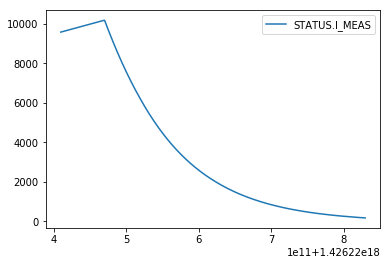

In [36]:
from lhcsmapi.pyedsl.dbsignal.SignalDbQueryFactory import SignalDbQueryFactory
system = 'FGC'
source = 'RPTE.UA47.RB.A45'
className = '51_self_pmd'
signal = 'STATUS.I_MEAS'
eventTime = 1426220469520000000
i_meas_df = SignalDbQueryFactory().build('pm', system=system, source=source, className=className, signal=signal, eventTime=eventTime).read()[0]
i_meas_df.plot()

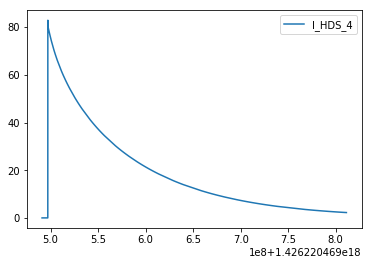

In [37]:
from lhcsmapi.pyedsl.dbsignal.SignalDbQueryFactory import SignalDbQueryFactory
system = "QPS"
className = "DQAMCNMB_PMHSU"
magnet = "B20L5"
signal = "I_HDS_4"
timestamp = 1426220469491000000
i_hds_4_df = SignalDbQueryFactory().build('pm', system=system, className=className, source=magnet, signal=signal, eventTime=timestamp).read()[0]
i_hds_4_df.plot()

- PM Fail Response

In case of a query failure, an empty is returned. 

In [38]:
from lhcsmapi.pyedsl.dbsignal.SignalDbQueryFactory import SignalDbQueryFactory
system = "QPS"
className = "DQAMCNMB_PMHSU"
magnet = "B20L5"
signal = "I_HDS_4"
timestamp = 142622046949100000 # last zero removed
i_hds_4_df = SignalDbQueryFactory().build('pm', system=system, className=className, source=magnet, signal=signal, eventTime=timestamp).read()[0]
i_hds_4_df

/eos/project/l/lhcsm/venv/lhcsmapi/pyedsl/dbsignal/post_mortem/PmDbRequest.py:165: UserWarning: Querying Post Mortem failed using the following query: http://pm-api-pro/v2/pmdata/signal?system=QPS&className=DQAMCNMB_PMHSU&source=B20L5&timestampInNanos=142622046949100000&signal=I_HDS_4
  warnings.warn(warning)


Empty DataFrame
Columns: []
Index: []

### 3.2.2. NxcalsDbSignal

- NXCALS Success Response

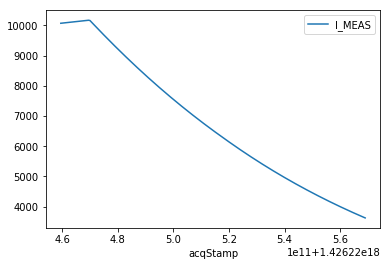

In [43]:
from lhcsmapi.pyedsl.dbsignal.SignalDbQueryFactory import SignalDbQueryFactory

nxcals_system = 'CMW'
nxcals_device = 'RPTE.UA47.RB.A45'
nxcals_property = 'SUB'
signal = 'I_MEAS'
t_start = 1426220469491000000
duration = [(10, 's'), (100, 's')]

i_meas_df = SignalDbQueryFactory().build('nxcals', nxcals_system=nxcals_system,  nxcals_device=[nxcals_device], nxcals_property=nxcals_property, 
                                         signals=[signal], t_start=t_start, duration=duration, spark=spark).read()[0]
i_meas_df.plot()

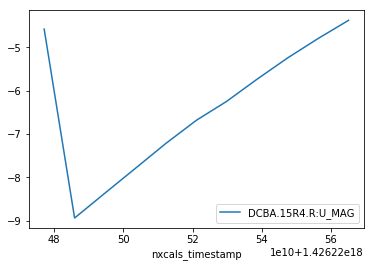

In [44]:
from lhcsmapi.pyedsl.dbsignal.SignalDbQueryFactory import SignalDbQueryFactory
nxcals_system = 'CMW'

signal = 'DCBA.15R4.R:U_MAG'
t_start = 1426220469491000000
duration = [(100, 's')]

u_mag_df = SignalDbQueryFactory().build('nxcals', nxcals_system=nxcals_system,
                                        signals=[signal], t_start=t_start, duration=duration, spark=spark).read()[0]
if not u_mag_df.empty:
    u_mag_df.plot()

In [45]:
from lhcsmapi.pyedsl.dbsignal.SignalDbQueryFactory import SignalDbQueryFactory

bmode_df = SignalDbQueryFactory().build('nxcals', nxcals_system='CMW',
                                        signals=['HX:BMODE'], t_start='2015-03-13 05:20:59.4910002', t_end='2015-04-13 05:20:59.4910002', spark=spark).read()[0]
bmode_df.head()

HX:BMODE
nxcals_timestamp             
1426513864882000000     SETUP
1426515551191000000    NOBEAM
1426597426610000000     SETUP
1426597576404000000    STABLE
1426598591040000000  UNSTABLE

- NXCALS Fail Response

In [47]:
from lhcsmapi.pyedsl.dbsignal.SignalDbQueryFactory import SignalDbQueryFactory
nxcals_system = 'WINCCOA'

signal = 'DCBA.15R4.R:U_MAG'
t_start = 1426220469491000000
duration = [(100, 's')]

u_mag_df = SignalDbQueryFactory().build('nxcals', nxcals_system=nxcals_system,
                                        signals=[signal], t_start=t_start, duration=duration, spark=spark).read()[0]
if not u_mag_df.empty:
    u_mag_df.plot()

/eos/project/l/lhcsm/venv/lhcsmapi/pyedsl/dbsignal/nxcals/NxcalsVariableSignalDbQuery.py:110: UserWarning: 'Illegal call to remote service for method=EntityResourceClient#findBy(QueryDataCriteria), status=400: Illegal Argument: Variables: [DCBA.15R4.R:U_MAG] were not found in system WINCCOA\nStacktrace: java.lang.IllegalArgumentException: Variables: [DCBA.15R4.R:U_MAG] were not found in system WINCCOA\n\tat cern.nxcals.service.internal.EntityResourceService.getVariablesFor(EntityResourceService.java:186)\n\tat cern.nxcals.service.internal.EntityResourceService.getVariableConfigs(EntityResourceService.java:131)\n\tat cern.nxcals.service.internal.EntityResourceService.getSourceConfigs(EntityResourceService.java:105)\n\tat cern.nxcals.service.internal.EntityResourceService.findBy(EntityResourceService.java:97)\n\tat cern.nxcals.service.internal.EntityResourceService$$FastClassBySpringCGLIB$$29e04dfb.invoke(<generated>)\n\tat org.springframework.cglib.proxy.MethodProxy.invoke(MethodProxy.j

In [49]:
from lhcsmapi.pyedsl.dbsignal.SignalDbQueryFactory import SignalDbQueryFactory
nxcals_system = 'CMW'
nxcals_device = 'RPTE.UA47.RB.A4' # missing last 5
nxcals_property = 'SUB'
signal = 'I_MEAS'
t_start = 1426220469491000000
duration = [(10, 's'), (100, 's')]

i_meas_df = SignalDbQueryFactory().build('nxcals', nxcals_system=nxcals_system,  nxcals_device=[nxcals_device], nxcals_property=nxcals_property, 
                                         signals=[signal], t_start=t_start, duration=duration, spark=spark).read()[0]
if not i_meas_df.empty:
    i_meas_df.plot()

/eos/project/l/lhcsm/venv/lhcsmapi/pyedsl/dbsignal/nxcals/NxcalsDevicePropertySignalDbQuery.py:119: UserWarning: 'Illegal call to remote service for method=EntityResourceClient#findBy(QueryDataCriteria), status=400: Illegal Argument: Entity with {property=SUB, device=RPTE.UA47.RB.A4} was not found in the system CMW\nStacktrace: java.lang.IllegalArgumentException: Entity with {property=SUB, device=RPTE.UA47.RB.A4} was not found in the system CMW\n\tat cern.nxcals.service.internal.EntityResourceService.getEntityConfigs(EntityResourceService.java:124)\n\tat cern.nxcals.service.internal.EntityResourceService.getSourceConfigs(EntityResourceService.java:107)\n\tat cern.nxcals.service.internal.EntityResourceService.findBy(EntityResourceService.java:97)\n\tat cern.nxcals.service.internal.EntityResourceService$$FastClassBySpringCGLIB$$29e04dfb.invoke(<generated>)\n\tat org.springframework.cglib.proxy.MethodProxy.invoke(MethodProxy.java:218)\n\tat org.springframework.aop.framework.CglibAopProxy$

## 3.3. Embedded Domain Specific Language in python (pyeDSL)

The Signal class serves it purpose to get a raw data for a single signal. However, it makes it difficult to generalize in order to acquire the same signal across several circuits. In addition, typical processing requires to use additional classes and introduce even more local variables

```python
circuit_type = 'RB'
circuit_name = 'RB.A12'
t_start = '2015-01-13 16:59:11+01:00'
t_end = '2015-01-13 17:15:46+01:00'
db = 'NXCALS'
system = 'PC'

metadata_pc = SignalMetadata.get_circuit_signal_database_metadata(circuit_type, circuit_name, system, db)
I_MEAS = SignalMetadata.get_signal_name(circuit_type, circuit_name, system, db, 'I_MEAS')

i_meas_nxcals_df = Signal().read(db, signal=I_MEAS, t_start=t_start, t_end=t_end, 
                                 nxcals_device=metadata_pc['device'], nxcals_property=metadata_pc['property'], nxcals_system=metadata_pc['system'], 
                                 spark=spark)

i_meas_nxcals_df = SignalUtilities.synchronize_df(i_meas_nxcals_df)
i_meas_nxcals_df = SignalUtilities.convert_indices_to_sec(i_meas_nxcals_df)

```

Several design flaws leading to inconsistency and code duplications:
- <span style="color: red;">use of multiple methods, multiple arguments (duplicated across methods)</span>
- <span style="color: red;">multiple local variables (naming consistency across analysis modules)</span>
- <span style="color: red;">order of methods and arguments (with duck typing) not fixed</span>

The API also does not answer in a generic way the following questions
- What if we want to get current for each circuit?
- What if we want to get several current signals?

Natural languages have certain structure [1]

|Language|Word order|Example|
|--------|---------------------------|--------------|
|English:| {Subject}.{Verb}.{Object}:| John ate cake|
|Japanese:| {Subject}.{Order}.{Verb}:| John-ga keiki-o tabeta|
|-|-| 			John cake ate |
                
One can enforce syntactical order in code:
 - Domain Specific Language – new language, requires parser
 - Embedded Domain Specific Language – extends existing language
 
Furthermore, an eDSL could be implemented following the Fluent interface approach [2]. The use of an eDSL for signal query and processing is not a new concept as there exists already an eDSL in Java used to automatically check signals during Hardware Commisionning campaigns of the LHC [3].

[1] K. Gulordava, Word order variation and dependency length minimisation: a cross-linguistic computational approach, PhD thesis, UniGe,  
[2] https://en.wikipedia.org/wiki/Fluent_interface  
[3] M. Audrain, et al. - Using a Java Embedded Domain-Specific Language for LHC Test Analysis, ICALEPCS2013, San Francisco, CA, USA  


### 3.3.1. QueryBuilder()

We propose a python embedded Domain Specific Language (pyeDSL) for building queries:
- General purpose query
<center>{DB}.{DURATION}.{QUERY_PARAMETERS}.{QUERY}</center>

e.g.
```python
df = QueryBuilder().{with_pm()/with_cals()/with_nxcals()}.with_duration().with_query_parameters()\
	.signal_query().dfs[0]
df = QueryBuilder().{with_pm()/with_cals()/with_nxcals()}.with_timestamp().with_query_parameters()\
	.signal_query().dfs[0]
```

- Circuit-oriented query to generalize query across and within circuit types
<center>{DB}.{DURATION}.{CIRCUIT_TYPE}.{METADATA}.{QUERY}</center>

e.g.  

```python
df = QueryBuilder().{with_pm()/with_cals()/with_nxcals()}.with_duration().with_circuit_type().with_metadata()\
	.signal_query().dfs[0]
df = QueryBuilder().{with_pm()/with_cals()/with_nxcals()}.with_timestamp().with_circuit_type().with_metadata()\
	.signal_query().dfs[0]
```

+ <span style="color: green;">each parameter defined once (validation of input at each stage)</span>
+ <span style="color: green;">single local variable</span>
+ <span style="color: green;">order of operation is fixed</span>
+ <span style="color: green;">support for vector inputs</span>
+ <span style="color: green;">time-dependent metadata</span>


The pyeDSL provides hints on the order of execution

In [50]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder

QueryBuilder()

Set database name using with_pm(), with_nxcals(spark), with_aft(session) methods.

In [51]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder

QueryBuilder().with_nxcals(spark)

Database name properly set to NXCALS. Set time definition: for PM signal query, with_timestamp(),
 for PM event query or AFT, NXCALS signal query, with_duration()

In [52]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder

QueryBuilder().with_nxcals(spark).with_duration(t_start='2015-03-13 05:20:59.4910002', duration=[(100, 's'), (100, 's')])

Query duration set to t_start=1426220359491000200, t_end=1426220559491000200. Set generic query parameter using with_query_parameters() method, or a circuit signal using with_circuit_type() method.

At the same time it prohibits unsupported operations throwing a meaningful exception

In [53]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder

QueryBuilder().with_duration(t_start='2015-03-13 05:20:59.4910002', duration=[(100, 's'), (100, 's')])

AttributeError: with_duration() is not supported. Set database name using with_pm(), with_nxcals(spark), with_aft(session) methods.

The following sections deal with: PM event and signal query, NXCALS signal and feature query, and AFT context and fault query. Each case is discussed with a general purpose query, where the user has to provide full data on signal name and its metadata as well as circuit-oriented queries which provide a generic way of querying LHC circuit variables. Both query types are polymorphic and complemented with a set of post-processing functions.


### 3.3.1a. General-Purpose Query - Examples
A sentence constructed this way maintains the differences of query types while providing a common structure

- PM event query

In [54]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder

source_timestamp_df = QueryBuilder().with_pm() \
    .with_duration(t_start='2015-03-13 05:20:59.4910002', duration=[(100, 's'), (100, 's')]) \
    .with_query_parameters(system='FGC', className='51_self_pmd', source='RPTE.UA47.RB.A45') \
    .event_query().df

source_timestamp_df

source            timestamp
0  RPTE.UA47.RB.A45  1426220469520000000

In [55]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder

source_timestamp_df = QueryBuilder().with_pm() \
    .with_duration(t_start='2015-03-13 05:20:59.4910002', duration=[(24*60*60, 's')]) \
    .with_query_parameters(system='QPS', className='DQAMCNMB_PMHSU', source='*') \
    .event_query().df

source_timestamp_df

source            timestamp
0   B20L5  1426220469491000000
1   C20L5  1426220517100000000
2   A20L5  1426220518112000000
3   A21L5  1426220625990000000
4   B21L5  1426220866112000000
5   C23L4  1426236802332000000
6   B23L4  1426236839404000000
7   A23L4  1426236839832000000
8   C22L4  1426236949841000000
9   C15R4  1426251285711000000
10  B15R4  1426251337747000000
11  A15R4  1426251388741000000
12  B34L8  1426258716281000000
13  C34L8  1426258747672000000
14  A34L8  1426258747370000000
15  C33L8  1426258835955000000
16  C34R7  1426258853947000000
17  A34R7  1426258854113000000
18  A20R3  1426267931956000000
19  B20R3  1426267983579000000
20  C20R3  1426268004144000000
21  B18L5  1426277626360000000
22  A18L5  1426277679838000000
23  C18L5  1426277680496000000
24  A19L5  1426277903449000000

- PM signal query

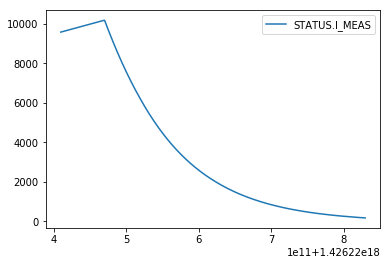

In [56]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder

i_meas_df = QueryBuilder().with_pm() \
    .with_timestamp(1426220469520000000) \
    .with_query_parameters(system='FGC', source='RPTE.UA47.RB.A45', className='51_self_pmd', signal='STATUS.I_MEAS') \
    .signal_query().dfs[0]

i_meas_df.plot()

- NXCALS signal query - device, property

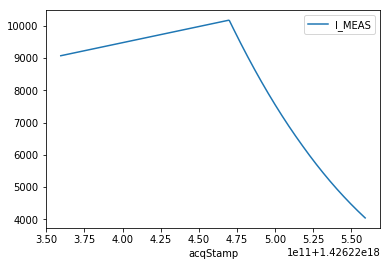

In [57]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder

i_meas_df = QueryBuilder().with_nxcals(spark) \
    .with_duration(t_start='2015-03-13 05:20:59.4910002', duration=[(100, 's'), (100, 's')]) \
    .with_query_parameters(nxcals_system='CMW', nxcals_device='RPTE.UA47.RB.A45', nxcals_property='SUB', signal='I_MEAS') \
    .signal_query().dfs[0]

i_meas_df.plot()

- NXCALS signal query - variable

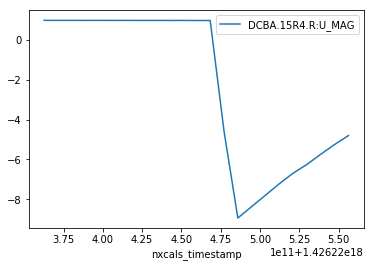

In [58]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder

u_mag_df = QueryBuilder().with_nxcals(spark) \
    .with_duration(t_start='2015-03-13 05:20:59.4910002', duration=[(100, 's'), (100, 's')]) \
    .with_query_parameters(nxcals_system='CMW', signal='DCBA.15R4.R:U_MAG') \
    .signal_query().dfs[0]

u_mag_df.plot()

In [59]:
bmode_df = QueryBuilder().with_nxcals(spark) \
    .with_duration(t_start='2015-03-13 05:20:59.4910002', t_end='2015-04-13 05:20:59.4910002') \
    .with_query_parameters(nxcals_system='CMW', signal='HX:BMODE') \
    .signal_query().dfs[0]

bmode_df.head()

HX:BMODE
nxcals_timestamp             
1426513864882000000     SETUP
1426515551191000000    NOBEAM
1426597426610000000     SETUP
1426597576404000000    STABLE
1426598591040000000  UNSTABLE

- NXCALS feature query - device, property

I_MEAS from beam injection, through beam acceleration, to stable beams

In [60]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder

i_meas_df = QueryBuilder().with_nxcals(spark) \
    .with_duration(t_start=1526898157236000000, t_end=1526903352338000000) \
    .with_query_parameters(nxcals_system='CMW', nxcals_device='RPTE.UA23.RB.A12', nxcals_property='SUB', signal='I_MEAS') \
    .feature_query(['mean', 'std', 'max', 'min', 'count']).df

i_meas_df

device count         mean          std     min      max
0  RPTE.UA23.RB.A12  2498  5374.768659  3315.972856  757.18  10978.8

- NXCALS feature query - variable

U_MAG from beam injection, through beam acceleration, to stable beams

In [61]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder

u_mag_df = QueryBuilder().with_nxcals(spark) \
    .with_duration(t_start=1526898157236000000, t_end=1526903352338000000) \
    .with_query_parameters(nxcals_system='CMW', signal='DCBB.8L2.R:U_MAG') \
    .feature_query(['mean', 'std', 'max', 'min', 'count']).df

u_mag_df

nxcals_variable_name  count      mean       std       min       max
0     DCBB.8L2.R:U_MAG  51951 -0.196706  0.375195 -0.975332  0.002113

### 3.3.1b. General-Purpose Query - Polymorphism
- multiple signal, mutliple sources, multiple systems, multiple className

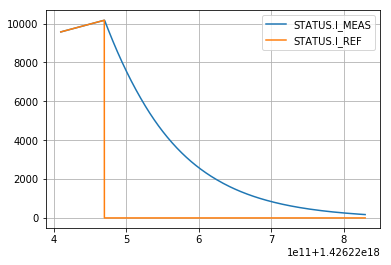

In [65]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder

i_meas_df = QueryBuilder().with_pm() \
    .with_timestamp(1426220469520000000) \
    .with_query_parameters(system=['FGC', 'FGC'], source=['RPTE.UA47.RB.A45', 'RPTE.UA47.RB.A45'], 
                           className=['51_self_pmd', '51_self_pmd'], signal=['STATUS.I_MEAS', 'STATUS.I_REF']) \
    .signal_query().dfs

ax=i_meas_df[0].plot()
i_meas_df[1].plot(ax=ax, grid=True)

- multiple signal, single source, single system, single className

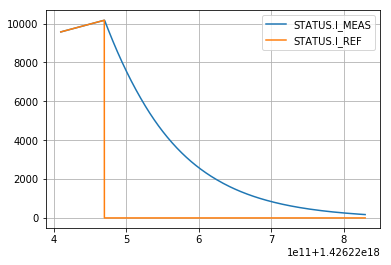

In [66]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder

i_meas_df = QueryBuilder().with_pm() \
    .with_timestamp(1426220469520000000) \
    .with_query_parameters(system='FGC', source='RPTE.UA47.RB.A45', 
                           className='51_self_pmd', signal=['STATUS.I_MEAS', 'STATUS.I_REF']) \
    .signal_query().dfs

ax=i_meas_df[0].plot()
i_meas_df[1].plot(ax=ax, grid=True)

### 3.3.1c. Circuit-Oriented Query - Examples
- PM event query

In [67]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder

source_timestamp_df = QueryBuilder().with_pm() \
    .with_duration(t_start='2015-03-13 05:20:59.4910002', duration=[(100, 's'), (100, 's')]) \
    .with_circuit_type('RB') \
    .with_metadata(circuit_name='RB.A45', system='PC') \
    .event_query().df

source_timestamp_df

source            timestamp
0  RPTE.UA47.RB.A45  1426220469520000000

In [68]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder

source_timestamp_df = QueryBuilder().with_pm() \
    .with_duration(t_start='2015-03-13 05:20:59.4910002', duration=[(24*60*60, 's')]) \
    .with_circuit_type('RB') \
    .with_metadata(circuit_name='RB.A45', system='QH', source='*') \
    .event_query().df

source_timestamp_df

source            timestamp
0   B20L5  1426220469491000000
1   C20L5  1426220517100000000
2   A20L5  1426220518112000000
3   A21L5  1426220625990000000
4   B21L5  1426220866112000000
5   C23L4  1426236802332000000
6   B23L4  1426236839404000000
7   A23L4  1426236839832000000
8   C22L4  1426236949841000000
9   C15R4  1426251285711000000
10  B15R4  1426251337747000000
11  A15R4  1426251388741000000
12  B34L8  1426258716281000000
13  C34L8  1426258747672000000
14  A34L8  1426258747370000000
15  C33L8  1426258835955000000
16  C34R7  1426258853947000000
17  A34R7  1426258854113000000
18  A20R3  1426267931956000000
19  B20R3  1426267983579000000
20  C20R3  1426268004144000000
21  B18L5  1426277626360000000
22  A18L5  1426277679838000000
23  C18L5  1426277680496000000
24  A19L5  1426277903449000000

- PM signal query

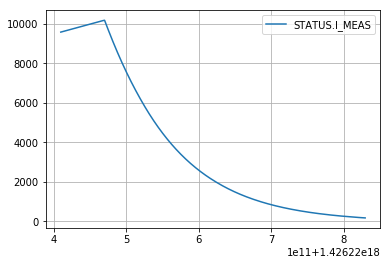

In [70]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder

i_meas_df = QueryBuilder().with_pm() \
    .with_timestamp(1426220469520000000) \
    .with_circuit_type('RB') \
    .with_metadata(circuit_name='RB.A45', system='PC', signal='I_MEAS') \
    .signal_query().dfs[0]

i_meas_df.plot(grid=True)

- NXCALS signal query - device, property

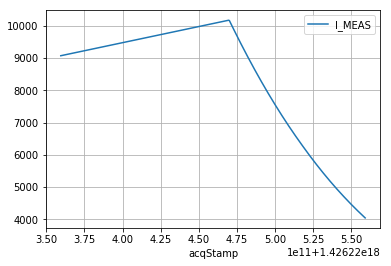

In [71]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder

i_meas_df = QueryBuilder().with_nxcals(spark) \
    .with_duration(t_start='2015-03-13 05:20:59.4910002', duration=[(100, 's'), (100, 's')]) \
    .with_circuit_type('RB') \
    .with_metadata(circuit_name='RB.A45', system='PC', signal='I_MEAS') \
    .signal_query().dfs[0]

i_meas_df.plot(grid=True)

- NXCALS signal query - variable

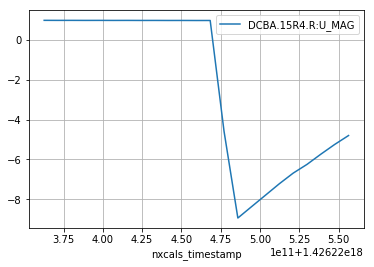

In [72]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder

u_mag_df = QueryBuilder().with_nxcals(spark) \
    .with_duration(t_start='2015-03-13 05:20:59.4910002', duration=[(100, 's'), (100, 's')]) \
    .with_circuit_type('RB') \
    .with_metadata(circuit_name='RB.A45', system='BUSBAR', signal='U_MAG', wildcard={'BUSBAR': 'DCBA.15R4.R'}) \
    .signal_query().dfs[0]

u_mag_df.plot(grid=True)

- NXCALS feature query - device, property

I_MEAS from beam injection, through beam acceleration, to stable beams

In [73]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder

i_meas_df = QueryBuilder().with_nxcals(spark) \
    .with_duration(t_start=1526898157236000000, t_end=1526903352338000000) \
    .with_circuit_type('RB') \
    .with_metadata(circuit_name='RB.A12', system='PC', signal='I_MEAS') \
    .feature_query(['mean', 'std', 'max', 'min', 'count']).df

i_meas_df

device count         mean          std     min      max
0  RPTE.UA23.RB.A12  2498  5374.768659  3315.972856  757.18  10978.8

- NXCALS feature query - variable

U_MAG from beam injection, through beam acceleration, to stable beams

In [74]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder

u_mag_df = QueryBuilder().with_nxcals(spark) \
    .with_duration(t_start=1526898157236000000, t_end=1526903352338000000) \
    .with_circuit_type('RB') \
    .with_metadata(circuit_name='RB.A12', system='BUSBAR', signal='U_MAG', wildcard={'BUSBAR': 'DCBB.8L2.R'}) \
    .feature_query(['mean', 'std', 'max', 'min', 'count']).df

u_mag_df

nxcals_variable_name  count      mean       std       min       max
0     DCBB.8L2.R:U_MAG  51951 -0.196706  0.375195 -0.975332  0.002113

### 3.3.1d. Circuit-Oriented Query - Polymorphism
- Multiple circuit names

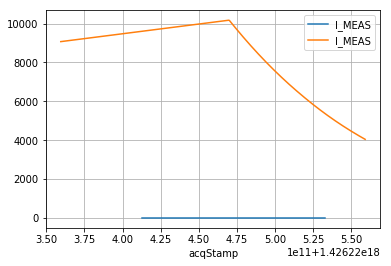

In [75]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder

i_meas_dfs = QueryBuilder().with_nxcals(spark) \
    .with_duration(t_start='2015-03-13 05:20:59.4910002', duration=[(100, 's'), (100, 's')]) \
    .with_circuit_type('RB') \
    .with_metadata(circuit_name=['RB.A12', 'RB.A45'], system='PC', signal='I_MEAS')\
    .signal_query().dfs

ax = i_meas_dfs[0].plot()
i_meas_dfs[1].plot(ax=ax, grid=True)

- Multiple system names

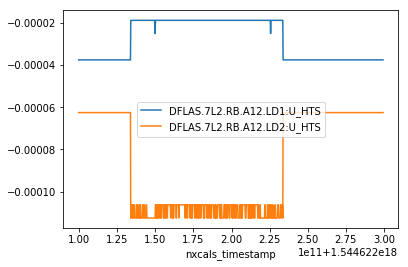

In [76]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder

u_hts_dfs = QueryBuilder().with_nxcals(spark) \
    .with_duration(t_start=1544622149598000000, duration=[(50, 's'), (150, 's')]) \
    .with_circuit_type('RB') \
    .with_metadata(circuit_name='RB.A12', system=['LEADS_EVEN', 'LEADS_ODD'], signal='U_HTS') \
    .signal_query().dfs

ax = u_hts_dfs[0].plot()
u_hts_dfs[1].plot(ax=ax)

- Multi-signal query

Polymorphic `signal_query()` call for NXCALS executes sequential queries of one signal at a time. This turns to be slow for multiple signals. Instead, `multi_signal_query()` queries multiple signals in parallel. This allows significantly reducing the query time (even 10x).

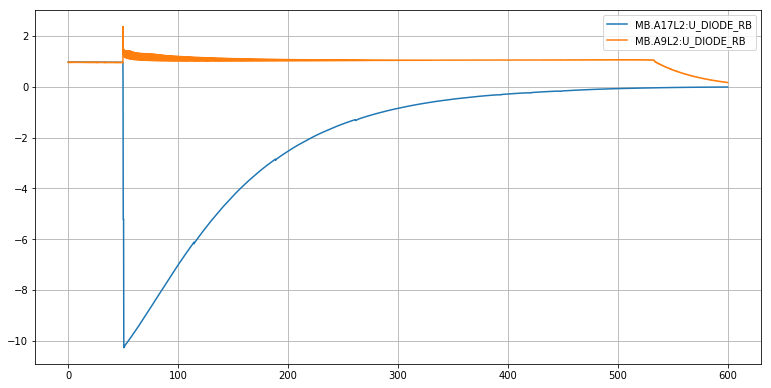

In [78]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder
import matplotlib.pyplot as plt

signal_dfs = QueryBuilder().with_nxcals(spark) \
    .with_duration(t_start='2018-12-03 05:20:00+01:00', t_end='2018-12-03 05:30:00+01:00') \
    .with_circuit_type('RB') \
    .with_metadata(circuit_name='RB.A12', system='DIODE_RB', signal='U_DIODE_RB', wildcard={'MAGNET': ['MB.A17L2', 'MB.A9L2']}) \
    .multi_signal_query() \
    .synchronize_time() \
    .convert_index_to_sec().dfs
    
fig, ax = plt.subplots(figsize=(13, 6.5))
for signal_df in signal_dfs:
    signal_df.plot(ax=ax, grid=True)

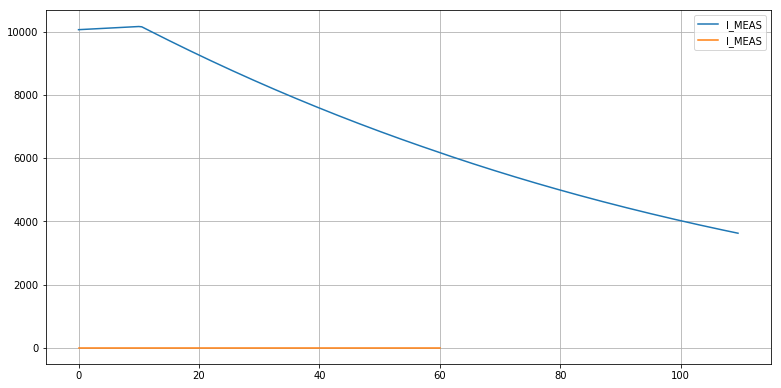

In [79]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder
import matplotlib.pyplot as plt

signal_dfs = QueryBuilder().with_nxcals(spark) \
    .with_duration(t_start='2015-03-13 05:20:59.491000000', t_end='2015-03-13 05:22:49.491000000') \
    .with_circuit_type('RB') \
    .with_metadata(circuit_name=['RB.A45', 'RB.A12'], system='PC', signal='I_MEAS') \
    .signal_query() \
    .synchronize_time() \
    .convert_index_to_sec().dfs

fig, ax = plt.subplots(figsize=(13, 6.5))
for signal_df in signal_dfs:
    signal_df.plot(ax=ax, grid=True)

- Multiple signal names

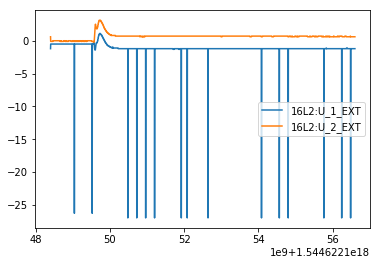

In [80]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder

u_ext_dfs = QueryBuilder().with_pm() \
    .with_timestamp(1544622149598000000) \
    .with_circuit_type('RQ') \
    .with_metadata(circuit_name='RQD.A12', system='QDS', signal=['U_1_EXT', 'U_2_EXT'],
                        source='16L2', wildcard={'CELL': '16L2'}) \
    .signal_query().dfs

ax = u_ext_dfs[0].plot()
u_ext_dfs[1].plot(ax=ax)

### 3.3.1e. Advanced Feature Query

NXCALS enables calculation of signal features such as min, max, mean, std, count directly on the cluster without the need for costly query of the signal and performing calculation locally. This approach enables parallel computing on the cluster. To this end, a query should contain an element enabling a group by operation. Each group by operation allows for executing computation in parallel. For the sake of compactness, we only show examples for circuit-oriented query, however, the same principle applies to the general-purpose queries.
- Feature query of multiple signals for the same period of time

In [81]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder

i_meas_df = QueryBuilder().with_nxcals(spark) \
    .with_duration(t_start=1526898157236000000, t_end=1526903352338000000) \
    .with_circuit_type('RB') \
    .with_metadata(circuit_name='*', system='PC', signal='I_MEAS') \
    .feature_query(['mean', 'std', 'max', 'min', 'count']).df

i_meas_df

device count         mean          std     min       max
0  RPTE.UA63.RB.A56  2498  5372.636369  3314.646638  756.90  10974.36
1  RPTE.UA87.RB.A81  2498  5371.596990  3314.230379  756.82  10973.21
2  RPTE.UA83.RB.A78  2498  5369.226934  3312.676833  756.47  10967.94
3  RPTE.UA27.RB.A23  2498  5373.973151  3315.324716  757.04  10976.46
4  RPTE.UA43.RB.A34  2497  5373.559131  3314.074552  756.95  10975.16
5  RPTE.UA67.RB.A67  2498  5374.329179  3315.855302  757.18  10978.56
6  RPTE.UA47.RB.A45  2497  5370.954557  3312.837184  756.71  10971.44
7  RPTE.UA23.RB.A12  2498  5374.768659  3315.972856  757.18  10978.80

- Feature query of multiple signals with the same period of time subdivided into three intervals - group by signal name and interval

In [83]:
t_start_injs = 1526898157236000000
t_end_injs = 1526899957236000000
t_start_sbs = 1526901552338000000
t_end_sbs = 1526903352338000000

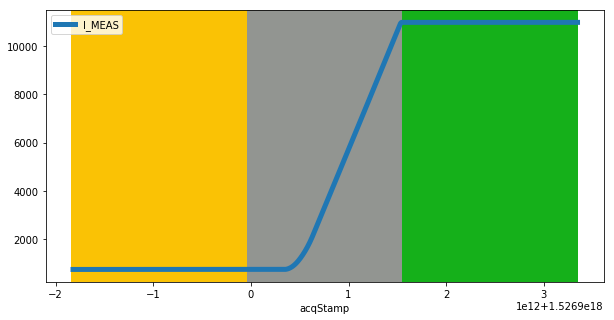

In [84]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder

i_meas_df = QueryBuilder().with_nxcals(spark) \
    .with_duration(t_start=t_start_injs, t_end=t_end_sbs) \
    .with_circuit_type('RB') \
    .with_metadata(circuit_name='RB.A12', system='PC', signal='I_MEAS')\
    .signal_query().dfs[0]

ax = i_meas_df.plot(figsize=(10,5), linewidth=5)
ax.axvspan(xmin=t_start_injs, xmax=t_end_injs, facecolor='xkcd:goldenrod')
ax.axvspan(xmin=t_end_injs, xmax=t_start_sbs, facecolor='xkcd:grey')
ax.axvspan(xmin=t_start_sbs, xmax=t_end_sbs, facecolor='xkcd:green')

Function translate introduces a mapping based on the time column. Here, we consider three subintervals for beam injection, beam acceleration, and stable beams.

As a result, the time column forms a partition and can be executed in parallel.

In [85]:
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType

def translate(timestamp):
    if(timestamp >= t_start_injs and timestamp < t_end_injs):
        return 1
    
    if(timestamp >=  t_end_injs and timestamp < t_start_sbs):
        return 2
    
    if(timestamp >= t_start_sbs and timestamp <= t_end_sbs):
        return 3
    
    return -1

translate_udf = udf(translate, IntegerType())

The translate function should be passed as a function argument

In [86]:
i_meas_df = QueryBuilder().with_nxcals(spark) \
    .with_duration(t_start=t_start_injs, t_end=t_end_sbs) \
    .with_circuit_type('RB') \
    .with_metadata(circuit_name='*', system='PC', signal='I_MEAS') \
    .feature_query(['mean', 'std', 'max', 'min', 'count'], function=translate_udf).df

i_meas_df

device class count          mean          std       min  \
0   RPTE.UA43.RB.A34     1    60    756.959833     0.001291    756.95   
1   RPTE.UA63.RB.A56     3    60  10974.350167     0.001291  10974.35   
2   RPTE.UA47.RB.A45     3    60  10971.439667     0.001810  10971.43   
3   RPTE.UA47.RB.A45     2  2377   5346.059971  3193.562789    756.71   
4   RPTE.UA23.RB.A12     3    60  10978.781500     0.007552  10978.77   
5   RPTE.UA83.RB.A78     2  2378   5344.349941  3193.572017    756.47   
6   RPTE.UA43.RB.A34     2  2377   5348.695949  3194.776339    756.95   
7   RPTE.UA67.RB.A67     1    60    757.188833     0.003237    757.18   
8   RPTE.UA87.RB.A81     3    60  10973.209167     0.002787  10973.20   
9   RPTE.UA27.RB.A23     2  2378   5349.106434  3196.138736    757.04   
10  RPTE.UA83.RB.A78     3    60  10967.940000     0.000000  10967.94   
11  RPTE.UA47.RB.A45     1    60    756.710000     0.000000    756.71   
12  RPTE.UA83.RB.A78     1    60    756.472000     0.004034    756.47   
13  RPTE.UA27.RB.A23     1    60    757.046833     0.004691    757.04   
14  RPTE.UA87.RB.A81     2  2378   5346.697637  3195.063002    756.83   
15  RPTE.UA87.RB.A81     1    60    756.829167     0.002787    756.82   
16  RPTE.UA23.RB.A12     2  2378   5349.879361  3196.753501    757.19   
17  RPTE.UA67.RB.A67     2  2378   5349.423865  3196.631627    757.18   
18  RPTE.UA63.RB.A56     2  2378   5347.758797  3195.477077    756.90   
19  RPTE.UA43.RB.A34     3    60  10975.154833     0.005039  10975.15   
20  RPTE.UA23.RB.A12     1    60    757.201667     0.007847    757.18   
21  RPTE.UA27.RB.A23     3    60  10976.450333     0.001810  10976.45   
22  RPTE.UA63.RB.A56     1    60    756.903667     0.004860    756.90   
23  RPTE.UA67.RB.A67     3    60  10978.550167     0.001291  10978.55   

         max  
0     756.96  
1   10974.36  
2   10971.44  
3   10970.89  
4   10978.80  
5   10967.54  
6   10974.68  
7     757.19  
8   10973.21  
9   10976.10  
10  10967.94  
11    756.71  
12    756.48  
13    757.05  
14  10972.79  
15    756.83  
16  10978.41  
17  10978.15  
18  10973.97  
19  10975.16  
20    757.22  
21  10976.46  
22    756.91  
23  10978.56

The same method applied to NXCALS signals based on variable

In [87]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder

u_mag_ab_df = QueryBuilder().with_nxcals(spark) \
    .with_duration(t_start=t_start_injs, t_end=t_end_sbs) \
    .with_circuit_type('RB') \
    .with_metadata(circuit_name='RB.A12', system='BUSBAR', signal='U_MAG', wildcard={'BUSBAR': 'DCBB.8L2.R'}) \
    .feature_query(['mean', 'std', 'max', 'min', 'count'], function=translate_udf).df

u_mag_ab_df

nxcals_variable_name class  count      mean       std       min       max
0     DCBB.8L2.R:U_MAG     3  18000 -0.001983  0.002882 -0.034035  0.002003
1     DCBB.8L2.R:U_MAG     1  18000 -0.001861  0.002844 -0.005992  0.002113
2     DCBB.8L2.R:U_MAG     2  15951 -0.636315  0.423767 -0.975332  0.002041

This method can be used together with signal decimation, i.e., taking every nth sample.

For example this can be useful to query QPS board A and B which share the same channel and samples are shifted by 5 so that 
- every 10-th sample belongs to board A (or B), decimation=10

In [88]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder

u_mag_a_df = QueryBuilder().with_nxcals(spark) \
    .with_duration(t_start=t_start_injs, t_end=t_end_sbs) \
    .with_circuit_type('RB') \
    .with_metadata(circuit_name='RB.A12', system='BUSBAR', signal='U_MAG', wildcard={'BUSBAR': 'DCBB.8L2.R'}) \
    .feature_query(['mean', 'std', 'max', 'min', 'count'], function=translate_udf, decimation=10).df

u_mag_a_df

nxcals_variable_name class count      mean       std       min       max
0     DCBB.8L2.R:U_MAG     3  1800  0.000812  0.000529 -0.012705  0.002003
1     DCBB.8L2.R:U_MAG     1  1800  0.000965  0.000434 -0.000463  0.002113
2     DCBB.8L2.R:U_MAG     2  1595 -0.633601  0.423847 -0.969405  0.002041

- every 5+10-th sample belongs to board B (or A), decimation=10, shift=5

In [89]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder

u_mag_b_df = QueryBuilder().with_nxcals(spark) \
    .with_duration(t_start=t_start_injs, t_end=t_end_sbs) \
    .with_circuit_type('RB') \
    .with_metadata(circuit_name='RB.A12', system='BUSBAR', signal='U_MAG', wildcard={'BUSBAR': 'DCBB.8L2.R'}) \
    .feature_query(['mean', 'std', 'max', 'min', 'count'], function=translate_udf, decimation=10, shift=5).df

u_mag_b_df

nxcals_variable_name class count      mean       std       min       max
0     DCBB.8L2.R:U_MAG     3  1800 -0.004754  0.000877 -0.034035 -0.003425
1     DCBB.8L2.R:U_MAG     1  1800 -0.004656  0.000441 -0.005992 -0.003361
2     DCBB.8L2.R:U_MAG     2  1595 -0.639233  0.423941 -0.975332 -0.003052

- with polymorphism one can query 1248 busbar at once (in two batches of 624 due to the limit of 1000 signal per query)

In [90]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder

u_mag_ab_df = QueryBuilder().with_nxcals(spark) \
    .with_duration(t_start=t_start_injs, t_end=t_end_sbs) \
    .with_circuit_type('RB') \
    .with_metadata(circuit_name='*', system='BUSBAR', signal='U_MAG', wildcard={'BUSBAR': '*'}) \
    .feature_query(['mean', 'std', 'max', 'min', 'count'], function=translate_udf).df

u_mag_ab_df.head()

nxcals_variable_name class  count      mean       std       min       max
0    DCBA.14L4.R:U_MAG     1  36000  0.000171  0.000603 -0.000796  0.001179
1   DCBB.B22L2.R:U_MAG     1  18000 -0.001283  0.000557 -0.003088  0.000341
2    DCBB.11L2.R:U_MAG     3  18000  0.001457  0.002587 -0.002121  0.048651
3    DCBA.15R4.R:U_MAG     2  15951  0.632161  0.423091 -0.001566  0.967469
4   DCBB.A23R1.L:U_MAG     1  18000 -0.002505  0.000457 -0.004140 -0.000787

### 3.3.1f. AFT Query

1. `/api/public/v1/accelerators`

  Retrieve all available accelerators.

In [91]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder

QueryBuilder().with_aft(session) \
    .context_query('accelerators')

/cvmfs/sft.cern.ch/lcg/views/LCG_95apython3_nxcals/x86_64-centos7-gcc7-opt/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


id            name
0       ISO_HRS      ISOLDE HRS
1        LINAC4          LINAC4
2         CLEAR           CLEAR
3          LEIR            LEIR
4       ISO_GPS      ISOLDE GPS
5           SPS             SPS
6        LINAC2          LINAC2
7            AD              AD
8         ELENA           ELENA
9        LINAC3          LINAC3
10           PS              PS
11          PSB             PSB
12          LHC             LHC
13  ISO_REX_HIE  ISOLDE REX-HIE

2. `/api/public/v1/accelerators/{acceleratorId}/properties`

  Retrieve the properties which are specific to the given accelerator.

In [92]:
QueryBuilder().with_aft(session) \
    .context_query('accelerators/{acceleratorId}/properties', context_id='LHC')

/cvmfs/sft.cern.ch/lcg/views/LCG_95apython3_nxcals/x86_64-centos7-gcc7-opt/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


group      id                    name pattern  \
0   LHC Fault Context  303161               Beam Mode    None   
1   LHC Fault Context  303160        Operational Mode    None   
2              Impact  193273      Prevents Injection    None   
3          R2E Status  266828              R2E Status    None   
4   LHC Fault Context  303158        Accelerator Mode    None   
5   LHC Fault Context  303163       Time in Fill (ms)    None   
6   LHC Fault Context  303166        Injection Scheme    None   
7   LHC Fault Context  303164       Time in Beam Mode    None   
8              Impact  193272         Precycle Needed    None   
9   LHC Fault Context  303159                 Fill No    None   
10             Impact  193271               RP Needed    None   
11  LHC Fault Context  303165  Time in Beam Mode (ms)    None   
12  LHC Fault Context  303162            Time in Fill    None   

                                               values  
0                                                  []  
1                                                  []  
2                                           [No, Yes]  
3   [R2E_CANDIDATE, NOT_R2E_RELATED, R2E_REJECTED,...  
4                                                  []  
5                                                  []  
6                                                  []  
7                                                  []  
8                                           [No, Yes]  
9                                                  []  
10                                          [No, Yes]  
11                                                 []  
12                                                 []

3. `/api/public/v1/accelerators/{acceleratorId}/systems`

  Retrieve the systems of the given accelerator.

In [93]:
QueryBuilder().with_aft(session) \
    .context_query('accelerators/{acceleratorId}/systems', context_id='LHC')

/cvmfs/sft.cern.ch/lcg/views/LCG_95apython3_nxcals/x86_64-centos7-gcc7-opt/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


children     id  \
0   [{'id': 31395, 'name': 'Access Infrastructure ...  83803   
1   [{'id': 371383, 'name': 'Machine Interlock Sys...     14   
2                                                  []  16739   
3   [{'id': 68, 'name': 'Cryogenics » Equipment', ...     16   
4   [{'id': 30655, 'name': 'LBDS » TCDQ', 'childre...     10   
5   [{'id': 55, 'name': 'Collimation » Interlocks ...     13   
6   [{'id': 89, 'name': 'Transverse Damper » Contr...     21   
7   [{'id': 31171, 'name': 'Cooling and Ventilatio...  83789   
8   [{'id': 86, 'name': 'Radio Frequency » Hardwar...     20   
9   [{'id': 106, 'name': 'SIS » Controls', 'childr...     26   
10  [{'id': 107, 'name': 'QPS » Controller', 'chil...     27   
11  [{'id': 79, 'name': 'Beam Injection » Oscillat...     18   
12  [{'id': 29456, 'name': 'Beam Exciters » Apertu...  29453   
13  [{'id': 21232, 'name': 'Injection Systems » MK...  21231   
14  [{'id': 66, 'name': 'Accelerator Controls » CM...     15   
15  [{'id': 45, 'name': 'Beam Losses » Other', 'ch...     11   
16  [{'id': 47, 'name': 'Beam Instrumentation » BP...     12   
17  [{'id': 31267, 'name': 'Electrical Network » B...  83823   
18  [{'id': 84, 'name': 'Operation » Operational e...     19   
19  [{'id': 73, 'name': 'Experiments » ATLAS', 'ch...     17   
20                                                 []  83801   
21  [{'id': 101, 'name': 'Injector Complex » Beam ...     24   
22  [{'id': 21228, 'name': 'Magnet circuits » Eart...  16738   
23  [{'id': 32132, 'name': 'IT Services » Network'...  32124   
24                                                 []     29   
25  [{'id': 31, 'name': 'Access System » Controls'...      9   
26  [{'id': 95, 'name': 'Orbit » Reference', 'chil...     22   
27                                                 []     28   
28  [{'id': 29452, 'name': 'Access Management » Ac...  29449   
29  [{'id': 103, 'name': 'Vacuum » Hardware', 'chi...     25   

                         name  
0       Access Infrastructure  
1   Machine Interlock Systems  
2         Beam-induced Quench  
3                  Cryogenics  
4                        LBDS  
5                 Collimation  
6           Transverse Damper  
7     Cooling and Ventilation  
8             Radio Frequency  
9                         SIS  
10                        QPS  
11             Beam Injection  
12              Beam Exciters  
13          Injection Systems  
14       Accelerator Controls  
15                Beam Losses  
16       Beam Instrumentation  
17         Electrical Network  
18                  Operation  
19                Experiments  
20          Ventilation Doors  
21           Injector Complex  
22            Magnet circuits  
23                IT Services  
24                      Other  
25              Access System  
26                      Orbit  
27           Power Converters  
28          Access Management  
29                     Vacuum

4. `/api/public/v1/faults`

  Search for faults fulfilling the given criteria.

In [95]:
QueryBuilder().with_aft(session) \
    .with_duration(t_start='2016-01-13T00:00:00Z', t_end='2016-05-13T00:00:00Z') \
    .fault_query(acceleratorId='LHC', accessNeeded=True)

/cvmfs/sft.cern.ch/lcg/views/LCG_95apython3_nxcals/x86_64-centos7-gcc7-opt/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


acceleratorName                       acceleratorPropertyInstances  \
0              LHC  [{'propertyName': 'Time in Fill', 'value': '02...   
1              LHC  [{'propertyName': 'Injection Scheme', 'value':...   
2              LHC  [{'propertyName': 'Time in Beam Mode (ms)', 'v...   
3              LHC  [{'propertyName': 'Accelerator Mode', 'value':...   
4              LHC  [{'propertyName': 'Fill No', 'value': '4885'},...   
5              LHC  [{'propertyName': 'Beam Mode', 'value': 'INJPR...   
6              LHC  [{'propertyName': 'Beam Mode', 'value': 'INJPR...   
7              LHC  [{'propertyName': 'Time in Fill', 'value': '05...   
8              LHC  [{'propertyName': 'Time in Beam Mode', 'value'...   
9              LHC  [{'propertyName': 'Time in Beam Mode', 'value'...   
10             LHC  [{'propertyName': 'Time in Beam Mode', 'value'...   
11             LHC  [{'propertyName': 'Operational Mode', 'value':...   
12             LHC  [{'propertyName': 'Accelerator Mode', 'value':...   
13             LHC  [{'propertyName': 'Accelerator Mode', 'value':...   
14             LHC  [{'propertyName': 'Injection Scheme', 'value':...   
15             LHC  [{'propertyName': 'Injection Scheme', 'value':...   

    accessNeeded                                        description  \
0          False  access sectors 4,5,6,7 and LHCb indicate "blue...   
1          False                  electrical problem on switchboard   
2          False  Ventilation doors in IP7, they do not close, n...   
3          False                           RQT13.R7B1 water problem   
4          False                                               None   
5          False                                               None   
6          False                                               None   
7          False                              cannot close door R74   
8          False                            opened while in beam ON   
9          False  The door opened because the closing mechanism ...   
10         False                                               None   
11         False                                               None   
12         False  RCBYV4.R1B1: Vin DC over voltage\nRQ7.R1 (AC f...   
13         False  RB.A34 warm cable cooling (interlock on water ...   
14         False                                               None   
15         False                      broken cable on thermo switch   

   displayLabel  duration  effectiveDuration               endTime  \
0          None   4890000            4890000  2016-05-12T16:06:12Z   
1          None  10123000           10123000  2016-05-12T15:10:42Z   
2          None   3011000            3011000  2016-05-06T13:23:42Z   
3          None  18288000           18288000  2016-05-06T12:33:31Z   
4          None  12347000           12347000  2016-05-06T07:28:43Z   
5          None   9298000            9298000  2016-05-05T20:15:30Z   
6          None   3817000            3817000  2016-05-05T15:39:44Z   
7          None   6114000            6114000  2016-05-05T09:52:50Z   
8          None  16471000           16471000  2016-04-26T13:39:48Z   
9          None   5433000            5433000  2016-04-12T07:57:09Z   
10         None   3091000            3091000  2016-04-08T09:07:23Z   
11         None     80000              80000  2016-04-07T16:04:39Z   
12         None  14998000           14998000  2016-04-01T05:16:05Z   
13         None   7654000            7654000  2016-03-30T22:44:40Z   
14         None  17483000           17483000  2016-03-28T08:00:42Z   
15         None  10820000           10820000  2016-03-25T19:00:15Z   

                                   faultyElementNames     id labelNames  \
0                                      [patrols lost]  26594     [TIOC]   
1                                          [RQ9.L2B1]  26599     [TIOC]   
2                          [Ventilation doors in IP7]  26462     [TIOC]   
3                 [RQT13.R7B1, RPMBA.RR77.RQT13.R7B1]  26459  

5. `/api/public/v1/faults/{faultId}`

  Retrieve one particular fault.

In [96]:
QueryBuilder().with_aft(session) \
    .context_query('faults/{faultId}', context_id=26594)

/cvmfs/sft.cern.ch/lcg/views/LCG_95apython3_nxcals/x86_64-centos7-gcc7-opt/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'id': 26594,
 'acceleratorName': 'LHC',
 'systemName': 'Access System » Hardware',
 'startTime': '2016-05-12T14:44:42Z',
 'endTime': '2016-05-12T16:06:12Z',
 'duration': 4890000,
 'effectiveDuration': 4890000,
 'description': 'access sectors 4,5,6,7 and LHCb indicate "blue" door statuses and have lost patrol',
 'displayLabel': None,
 'stateChanges': [{'stateId': 'BLOCKING_OP', 'time': '2016-05-12T14:44:42Z'},
  {'stateId': 'OP_ENDED', 'time': '2016-05-12T16:06:12Z'}],
 'accessNeeded': True,
 'reviewedByAwg': True,
 'reviewedByExpert': True,
 'labelNames': ['TIOC'],
 'parentId': None,
 'parentSystemName': None,
 'systemPropertyInstances': [],
 'acceleratorPropertyInstances': [{'propertyName': 'Time in Fill',
   'value': '02h 13min 44s'},
  {'propertyName': 'Injection Scheme',
   'value': '2nominals_10pilots_RomanPot_Alignment'},
  {'propertyName': 'Accelerator Mode', 'value': 'Proton Physics'},
  {'propertyName': 'R2E Status', 'value': 'NOT_R2E_RELATED'},
  {'propertyName': 'Fill No', 

6. `/api/public/v1/faults/labels`

  Retrieve all labels attached to any fault.

In [97]:
QueryBuilder().with_aft(session) \
    .context_query('faults/labels')

/cvmfs/sft.cern.ch/lcg/views/LCG_95apython3_nxcals/x86_64-centos7-gcc7-opt/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


id                                    name
0   152937                     60A BPM Interaction
1   302613                                      T4
2    83888                                    TIOC
3   284995                           Access PS/PSB
4   372881                                     LBE
5   262457                                     PSU
6   370386  klystron instability + modulator fault
7   255578                       AWG Notable Fault
8   372879                            Power supply
9   189853                       BLM Sanity Checks
10  302604                                    LEIR
11  189865                              False Dump
12  114933                                  TE-EPC
13  372379                             Major Event
14  260311                                   SR7.C
15  248740                                 PIC PLC
16  256924                                    Ions
17  259150                                   BLETC
18  281492                      pole-phase winding
19  302618                                    frev
20  152921                       MPE-EPC Interface
21  260308                                     SEM
22  249289                             human error
23  358893                                   BLECF
24   87033                             Septum down
25  259163                            SR5.L.CD11.B
26  302607                                  CPS RF
27  302570                       Flowmeter problem
28  302592                                  LINAC3
29  302599                                  source
30  372381          Major Machine Protection Event
31  300628                                     REX
32  289715                       RFQ RF protection
33  372877                                Ion pump
34  191632                         MENA-20 (BE-CO)
35  376535                      TAILCLIPPER TIMING

7. `/api/public/v1/faults/states`

  Retrieve all possible states a fault can be in.

In [98]:
QueryBuilder().with_aft(session) \
    .context_query('faults/states')

/cvmfs/sft.cern.ch/lcg/views/LCG_95apython3_nxcals/x86_64-centos7-gcc7-opt/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


id                 name
0      NON_BLOCKING_OP      Non-Blocking OP
1            CANCELLED            Cancelled
2           UNDERSTOOD           Understood
3            SUSPENDED            Suspended
4  SYSTEM_EXPERT_ENDED  System Expert Ended
5             OP_ENDED             OP Ended
6          BLOCKING_OP          Blocking OP

8. `/api/public/v1/faulty-element-types`

  Retrieve all faulty element types in use in AFT.

In [99]:
QueryBuilder().with_aft(session) \
    .context_query('faulty-element-types')

/cvmfs/sft.cern.ch/lcg/views/LCG_95apython3_nxcals/x86_64-centos7-gcc7-opt/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


name
0                         PXACC40
1                         PXRKDIO
2                         HCTCSG_
3            L4LAINTLKSRC v.3.1.1
4                      PXBTVBM004
5                         HCRPZES
6                         HCRPZEQ
7                         HCTCDIV
8                         HCRPZEO
9                      PXLMK__003
10                         RCBV33
11                        PXRK___
12                           RNFH
13                        HCCFI__
14                        HCRPZEG
15                        HCRPZEH
16                         RCBV31
17                        HCRPZEF
18                     HCBVCRA001
19                        HCRPZEB
20                        PXACH__
21                            RAC
22                     PXDHZ__8AF
23                        PXKHZ__
24                        HCETH__
25   MKController_Virtual v.0.1.0
26                   LEBT v.2.0.4
27                         RCBV27
28                     PXMCVEBHWC
29                            RAR
..                            ...
407                       HCTCL__
408                    PXDVT__00T
409                    HCLY___129
410                    HCLY___005
411                 LTIM v.4.1.13
412                    HCRS___033
413                       PXSTP__
414                         RQT12
415                       HCEAV__
416                       PXCK___
417                         RQT13
418                          RBIV
419                          RSMV
420                        RDHZPS
421                    PXMQNFA4WP
422                    PVPUMP v.0
423                    PXMCXBBWAP
424                 LHC HALF-CELL
425                       HCCFP__
426       GENERAL UNDG CIVIL WORK
427          PreChopperL4 v.4.5.7
428                    PXMONDAFWP
429                          RQIF
430                          RSMH
431                    PXMBHGC4WP
432                          RQID
433                       HCRPHGC
434                       HCDQQDC
435                       HCRPHGA
436                       HCRPHGB

[437 rows x 1 columns]

9. `/api/public/v1/faulty-elements`

  Retrieve all faulty elements in use in AFT. The results are paginated.

In [100]:
QueryBuilder().with_aft(session) \
    .context_query('faulty-elements')

/cvmfs/sft.cern.ch/lcg/views/LCG_95apython3_nxcals/x86_64-centos7-gcc7-opt/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


id                                      name    source
0   165220               12 bunches train setting-up  ELOGBOOK
1   160394                                       ***  ELOGBOOK
2   160177                                      12L6    LAYOUT
3   173454                                         !  ELOGBOOK
4   174929                                       118  ELOGBOOK
5   163767                             Thermoswitch   ELOGBOOK
6   159257           12 b SPS-Ring 1 off by 1 bucket  ELOGBOOK
7   165507                                  ER.KFH32  ELOGBOOK
8   165197          12b train lost at start SPS ramp  ELOGBOOK
9   163273                                      11L1    LAYOUT
10  164445                                 10Mhz C76  ELOGBOOK
11  159703                       1 injection missing  ELOGBOOK
12  161267                              10MHz Cavity  ELOGBOOK
13  161644                            CCC/CCR router  ELOGBOOK
14  162274                                12 bunches  ELOGBOOK
15  165546                                   BI4.DIS  ELOGBOOK
16  161016                  12 circuits in Sector 67  ELOGBOOK
17  163671                                 10MHz C66  ELOGBOOK
18  160100                 10 MHz cavity replacement  ELOGBOOK
19  163584                                     10L3   ELOGBOOK
20  282777                                       10M  ELOGBOOK
21  162701                      12 bunches on TDI B1  ELOGBOOK
22  164662                                 12b train  ELOGBOOK
23  193253                              10MHz.Cavity  ELOGBOOK
24  161067                     144 bunches unstable   ELOGBOOK
25  160213                                 ROD.A34B2  ELOGBOOK
26  160310                             10 Mhz cavity  ELOGBOOK
27  159551                            dump intensity  ELOGBOOK
28  159882                                 XLL2.CAV4  ELOGBOOK
29  160036                           10 MHz cavities  ELOGBOOK
30  163118                             10MHz casvity  ELOGBOOK
31  165387                                  playback  ELOGBOOK
32  163731                                BTY.QDE182  ELOGBOOK
33  187170                12btrain_intensity_too_low  ELOGBOOK
34  165364                            10MHz cavities  ELOGBOOK
35  164040   Smoke detected Firebrigade intervention  ELOGBOOK
36  162079                10MHz 56 66 76 81 86 91 96  ELOGBOOK
37  160678                                 XLL2.CAV2  ELOGBOOK
38  165302                            11/51/66/76/86  ELOGBOOK
39  162864                                BTY.QFO210  ELOGBOOK
40  161130                                  BETS SPS  ELOGBOOK
41  162024                                       PFW  ELOGBOOK
42  163520                                      11L5    LAYOUT
43  165641                                            ELOGBOOK
44  160435                      10MHz cavities fault  ELOGBOOK
45  162967                       bunches measurement  ELOGBOOK
46  164509                                     10MHz  ELOGBOOK
47  249312                            06X.BA6.SPARE2    LAYOUT
48  178185                                         -  ELOGBOOK
49  164412                              10MHz cavity  ELOGBOOK

10. `/api/public/v1/faulty-elements/{faultyElementId}/statistics`

  Retrieve faulty element statistics from AFT

In [101]:
QueryBuilder().with_aft(session) \
    .context_query('faulty-elements/{faultyElementId}/statistics', context_id=163188)

/cvmfs/sft.cern.ch/lcg/views/LCG_95apython3_nxcals/x86_64-centos7-gcc7-opt/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


id  faultCount  faultDuration
163188  163188           1        2065000

11. `/api/public/v1/systems/{systemId}/properties`

  Retrieve the properties which are specific to the given system.

In [102]:
QueryBuilder().with_aft(session) \
    .context_query('systems/{systemId}/properties', context_id=83823)

/cvmfs/sft.cern.ch/lcg/views/LCG_95apython3_nxcals/x86_64-centos7-gcc7-opt/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


id                  name               pattern  \
0  166765         TI Fault Type                  None   
1  358702                 Cause                  None   
2  302969   Voltage Dip % (RTE)  [-+]?[0-9]*\.?[0-9]*   
3  302967     Duration ms (RTE)  [-+]?[0-9]*\.?[0-9]*   
4  166766     TI Major Event Id           [1-9][0-9]*   
5  358703       Origin Location                  None   
6  302968    Duration ms (CERN)  [-+]?[0-9]*\.?[0-9]*   
7  302970  Voltage Dip % (CERN)  [-+]?[0-9]*\.?[0-9]*   

                                              values  
0  [Cable, Fuse, PLC Hardware, Wrong Action, Rela...  
1  [Wind, Pollution, Snow, Unknown, Wildlife, Sho...  
2                                                 []  
3                                                 []  
4                                                 []  
5  [Grande Ile - Le Cheylas, Albertville - Coche ...  
6                                                 []  
7                                                 []

## 7.1.6. Processing Raw Signals
Once a signal is queried, one can perform some operations on each of them.  
In this case, the order of operations does not matter (but can be checked).  

|Signal query|Signal processing|
| ---------- | :-------------- |
|{DB}.{DURATION}.{QUERY_PARAMETERS}.{QUERY}| |
|{DB}.{DURATION}.{CIRCUIT_TYPE}.{METADATA}.{QUERY}| |
|&nbsp;|.synchronize_time()|
|&nbsp;|.convert_index_to_sec()|
|&nbsp;|.create_col_from_index()|
|&nbsp;|.filter_median()|
|&nbsp;|.remove_values_for_time_less_than()|
|&nbsp;|.remove_initial_offset()|

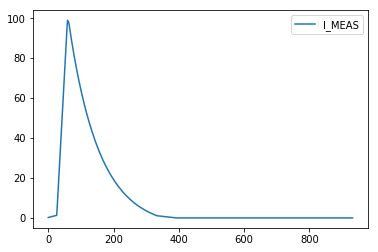

In [103]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder

i_meas_df = QueryBuilder().with_nxcals(spark) \
    .with_duration(t_start='2015-01-13 16:59:11+01:00', t_end='2015-01-13 17:15:46+01:00') \
    .with_circuit_type('RB') \
    .with_metadata(circuit_name='RB.A12', system='PC', signal='I_MEAS') \
    .signal_query() \
    .synchronize_time() \
    .convert_index_to_sec().dfs[0]

i_meas_df.plot()

### 3.3.4. Processing Raw Events
For PM event queries one can perform several operations on source, timestamp dataframe. 

|Event query|Event processing|
| ---------- | :-------------- |
|{DB}.{DURATION}.{QUERY_PARAMETERS}.{QUERY}| |
|{DB}.{DURATION}.{CIRCUIT_TYPE}.{METADATA}.{QUERY}| |
|&nbsp;|.filter_source()|
|&nbsp;|.drop_duplicate_source()|
|&nbsp;|.sort_values()|

The processing methods are dedicated to performing repeated operations on PM events. In case of searching a given system and className with wildcard '\*' as a source, the event query can return events from different sectors. In this case, one can filter events to contain to a given sector. Some PM systems return duplicate events from different types of boards. In this case one can drop duplicate sources. Eventually, the events can be sorted by either source or timestamp.


- Filter source

In [104]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder

source_timestamp_df = QueryBuilder().with_pm() \
    .with_duration(t_start='2015-03-13 05:20:59.4910002', duration=[(24*60*60, 's')]) \
    .with_circuit_type('RB') \
    .with_metadata(circuit_name='RB.A45', system='QH', source='*') \
    .event_query() \
    .df

source_timestamp_df

source            timestamp
0   B20L5  1426220469491000000
1   C20L5  1426220517100000000
2   A20L5  1426220518112000000
3   A21L5  1426220625990000000
4   B21L5  1426220866112000000
5   C23L4  1426236802332000000
6   B23L4  1426236839404000000
7   A23L4  1426236839832000000
8   C22L4  1426236949841000000
9   C15R4  1426251285711000000
10  B15R4  1426251337747000000
11  A15R4  1426251388741000000
12  B34L8  1426258716281000000
13  C34L8  1426258747672000000
14  A34L8  1426258747370000000
15  C33L8  1426258835955000000
16  C34R7  1426258853947000000
17  A34R7  1426258854113000000
18  A20R3  1426267931956000000
19  B20R3  1426267983579000000
20  C20R3  1426268004144000000
21  B18L5  1426277626360000000
22  A18L5  1426277679838000000
23  C18L5  1426277680496000000
24  A19L5  1426277903449000000

Executing filter_source() with circuit name and system type would filter out events not belonging to a given circuit name

In [105]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder

source_timestamp_df = QueryBuilder().with_pm() \
    .with_duration(t_start='2015-03-13 05:20:59.4910002', duration=[(24*60*60, 's')]) \
    .with_circuit_type('RB') \
    .with_metadata(circuit_name='RB.A45', system='QH', source='*') \
    .event_query() \
    .filter_source('RB.A45', 'QH') \
    .df

source_timestamp_df

source            timestamp
0   B20L5  1426220469491000000
1   C20L5  1426220517100000000
2   A20L5  1426220518112000000
3   A21L5  1426220625990000000
4   B21L5  1426220866112000000
5   C15R4  1426251285711000000
6   B15R4  1426251337747000000
7   A15R4  1426251388741000000
8   B18L5  1426277626360000000
9   A18L5  1426277679838000000
10  C18L5  1426277680496000000
11  A19L5  1426277903449000000

- Drop duplicates

In [106]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder

source_timestamp_df = QueryBuilder().with_pm() \
    .with_duration(t_start='2015-03-13 05:20:59.4910002', duration=[(24*60*60, 's')]) \
    .with_circuit_type('RB') \
    .with_metadata(circuit_name='RB.A45', system='QDS', source='*') \
    .event_query() \
    .drop_duplicate_source() \
    .df

source_timestamp_df

source            timestamp
0   B20L5  1426220469490000000
1   C20L5  1426220517099000000
2   A20L5  1426220518111000000
3   A21L5  1426220625989000000
4   B21L5  1426220866111000000
5   C23L4  1426236802331000000
6   B23L4  1426236839403000000
7   A23L4  1426236839831000000
8   C22L4  1426236949840000000
9   C15R4  1426251285710000000
10  B15R4  1426251337746000000
11  A15R4  1426251388740000000
12  B34L8  1426258716280000000
13  A34L8  1426258747369000000
14  C34L8  1426258747671000000
15  C33L8  1426258835954000000
16  C34R7  1426258853946000000
17  A34R7  1426258854112000000
18  A20R3  1426267931955000000
19  B20R3  1426267983578000000
20  C20R3  1426268004143000000
21  B18L5  1426277626359000000
22  A18L5  1426277679837000000
23  C18L5  1426277680495000000
24  A19L5  1426277903448000000

Executing filter_source() with circuit name and system type would filter out events not belonging to a given circuit name

In [107]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder

source_timestamp_df = QueryBuilder().with_pm() \
    .with_duration(t_start='2015-03-13 05:20:59.4910002', duration=[(24*60*60, 's')]) \
    .with_circuit_type('RB') \
    .with_metadata(circuit_name='RB.A45', system='QDS', source='*') \
    .event_query() \
    .filter_source('RB.A45', 'QDS') \
    .df

source_timestamp_df

source            timestamp
0   B20L5  1426220469490000000
1   C20L5  1426220517099000000
2   A20L5  1426220518111000000
3   A21L5  1426220625989000000
4   B21L5  1426220866111000000
5   B20L5  1426220469492000000
6   C20L5  1426220517101000000
7   A20L5  1426220518113000000
8   A21L5  1426220625991000000
9   B21L5  1426220866113000000
10  C15R4  1426251285710000000
11  B15R4  1426251337746000000
12  A15R4  1426251388740000000
13  C15R4  1426251285712000000
14  B15R4  1426251337748000000
15  A15R4  1426251388742000000
16  B18L5  1426277626359000000
17  A18L5  1426277679837000000
18  C18L5  1426277680495000000
19  A19L5  1426277903448000000
20  B18L5  1426277626361000000
21  A18L5  1426277679839000000
22  C18L5  1426277680497000000
23  A19L5  1426277903450000000

- drop_duplicate_source()

Some PM systems return duplicate events from different types of boards. In this case one can drop duplicate sources. 

In [108]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder

source_timestamp_df = QueryBuilder().with_pm() \
    .with_duration(t_start='2015-03-13 05:20:59.4910002', duration=[(24*60*60, 's')]) \
    .with_circuit_type('RB') \
    .with_metadata(circuit_name='RB.A45', system='QDS', source='*') \
    .event_query() \
    .filter_source('RB.A45', 'QDS') \
    .drop_duplicate_source() \
    .df

source_timestamp_df

source            timestamp
0   B20L5  1426220469490000000
1   C20L5  1426220517099000000
2   A20L5  1426220518111000000
3   A21L5  1426220625989000000
4   B21L5  1426220866111000000
5   C15R4  1426251285710000000
6   B15R4  1426251337746000000
7   A15R4  1426251388740000000
8   B18L5  1426277626359000000
9   A18L5  1426277679837000000
10  C18L5  1426277680495000000
11  A19L5  1426277903448000000

- sort_values()

The events can be sorted by either source or timestamp.

In [109]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder

source_timestamp_df = QueryBuilder().with_pm() \
    .with_duration(t_start='2015-03-13 05:20:59.4910002', duration=[(24*60*60, 's')]) \
    .with_circuit_type('RB') \
    .with_metadata(circuit_name='RB.A45', system='QDS', source='*') \
    .event_query() \
    .filter_source('RB.A45', 'QDS') \
    .drop_duplicate_source() \
    .sort_values(by='timestamp') \
    .df

source_timestamp_df

source            timestamp
0   B20L5  1426220469490000000
1   C20L5  1426220517099000000
2   A20L5  1426220518111000000
3   A21L5  1426220625989000000
4   B21L5  1426220866111000000
5   C15R4  1426251285710000000
6   B15R4  1426251337746000000
7   A15R4  1426251388740000000
8   B18L5  1426277626359000000
9   A18L5  1426277679837000000
10  C18L5  1426277680495000000
11  A19L5  1426277903448000000

## 3.4. AssertionBuilder()

<center>{SIGNALS}.(TIME_RANGE).{ASSERTION}

|Signal input|Time range definition (optional) / Signal assertion|Signal assertions (if time range defined)|
| ---------- | :------------------ |-----------------|
|.with_signal()|&nbsp;|&nbsp;|
|&nbsp;|.has_min_max_value()|&nbsp;|
|&nbsp;|.compare_to_reference()|&nbsp;|
|&nbsp;|.with_time_range()|.has_min_max_variation()|
|&nbsp;|.with_time_range()|.has_min_max_slope()|

- has_min_max_value()

<img src="https://gitlab.cern.ch/LHCData/lhc-sm-api/raw/master/figures/MP3.png" width=75%>

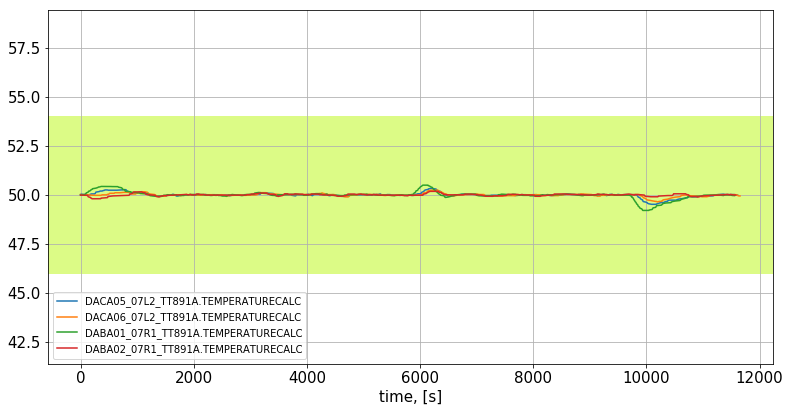

In [110]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder
from lhcsmapi.pyedsl.AssertionBuilder import AssertionBuilder

tt891a_dfs = QueryBuilder().with_nxcals(spark) \
    .with_duration(t_start='2014-12-13 09:12:41+01:00', t_end='2014-12-13 12:27:11+01:00') \
    .with_circuit_type('RB') \
    .with_metadata(circuit_name='RB.A12', system=['LEADS_EVEN_WINCCOA', 'LEADS_ODD_WINCCOA'], signal='TT891A') \
    .signal_query() \
    .synchronize_time() \
    .convert_index_to_sec() \
    .filter_median().dfs


AssertionBuilder().with_signal(tt891a_dfs) \
    .has_min_max_value(value_min=46, value_max=54)

In the case below, the assertion should fail and raise a warning.

DACA05_07L2_TT891A.TEMPERATURECALC outside of the [50, 54] threshold
DACA06_07L2_TT891A.TEMPERATURECALC outside of the [50, 54] threshold
DABA01_07R1_TT891A.TEMPERATURECALC outside of the [50, 54] threshold
DABA02_07R1_TT891A.TEMPERATURECALC outside of the [50, 54] threshold


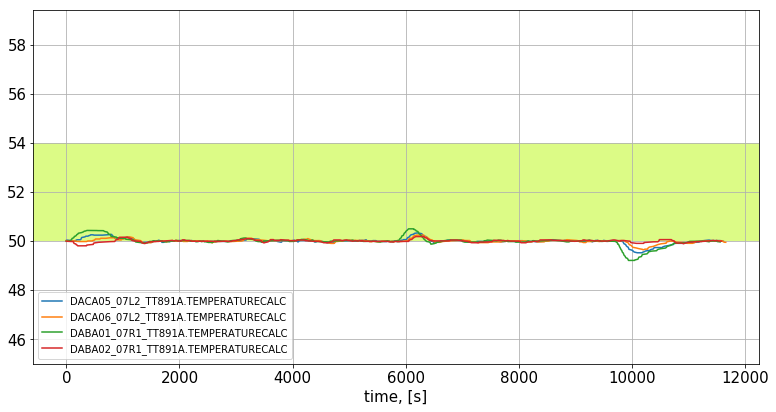

In [111]:
AssertionBuilder().with_signal(tt891a_dfs) \
    .has_min_max_value(value_min=50, value_max=54)

- compare_to_reference()

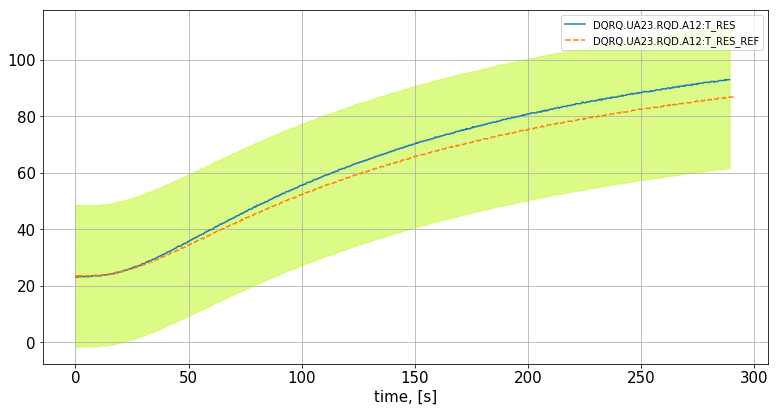

In [112]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder
from lhcsmapi.pyedsl.AssertionBuilder import AssertionBuilder
from lhcsmapi.reference.Reference import Reference
from lhcsmapi.Time import Time

timestamp_ee_rqd = 1544622149701000000
timestamp_fgc_rqd = 1544622149620000000
signal_names = 'T_RES'


t_res_df = QueryBuilder().with_pm() \
    .with_timestamp(timestamp_ee_rqd) \
    .with_circuit_type('RQ') \
    .with_metadata(circuit_name='RQD.A12', system='EE', signal=signal_names).signal_query() \
    .remove_values_for_time_less_than(timestamp_ee_rqd) \
    .synchronize_time(timestamp_fgc_rqd) \
    .convert_index_to_sec().dfs[0]


timestamp_ee_ref_rqd = Reference.get_power_converter_reference_fpa('RQ', 'RQD.A12', 'eePm')
timestamp_ee_ref_rqd = Time.to_unix_timestamp(timestamp_ee_ref_rqd)

timestamp_fgc_ref_rqd = Reference.get_power_converter_reference_fpa('RQ', 'RQD.A12', 'fgcPm')
timestamp_fgc_ref_rqd = Time.to_unix_timestamp(timestamp_fgc_ref_rqd)


t_res_ref_df = QueryBuilder().with_pm() \
    .with_timestamp(timestamp_ee_ref_rqd) \
    .with_circuit_type('RQ') \
    .with_metadata(circuit_name='RQD.A12', system='EE', signal=signal_names).signal_query() \
    .remove_values_for_time_less_than(timestamp_ee_ref_rqd) \
    .synchronize_time(timestamp_fgc_ref_rqd) \
    .convert_index_to_sec().dfs[0]

AssertionBuilder().with_signal([t_res_df])\
    .compare_to_reference(signal_ref_dfs=[t_res_ref_df], abs_margin=25, scaling=1)

- has_min_max_variation()

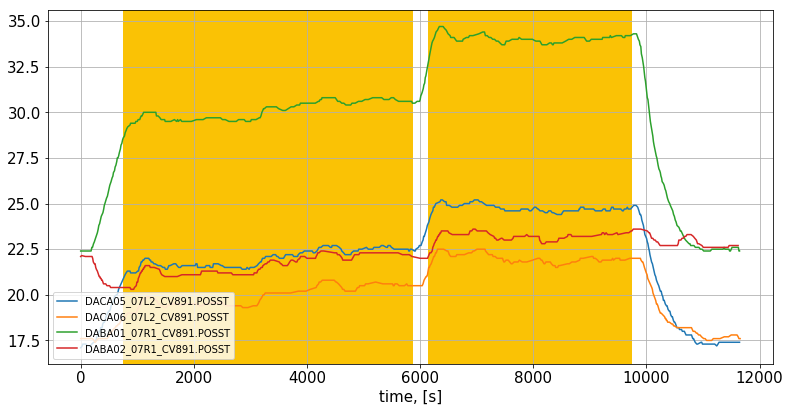

In [113]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder
from lhcsmapi.pyedsl.AssertionBuilder import AssertionBuilder
from lhcsmapi.analysis.busbar.BusbarResistanceAnalysis import BusbarResistanceAnalysis

t_start = '2014-12-13 09:12:41+01:00'
t_end = '2014-12-13 12:27:11+01:00'

cv891_dfs = QueryBuilder().with_nxcals(spark) \
    .with_duration(t_start=t_start, t_end=t_end) \
    .with_circuit_type('RB') \
    .with_metadata(circuit_name='RB.A12', system=['LEADS_EVEN_WINCCOA', 'LEADS_ODD_WINCCOA'], signal='CV891') \
    .signal_query() \
    .synchronize_time() \
    .convert_index_to_sec() \
    .filter_median() \
    .dfs

i_meas_raw_df = QueryBuilder().with_nxcals(spark) \
    .with_duration(t_start=t_start, t_end=t_end) \
    .with_circuit_type('RB') \
    .with_metadata(circuit_name='RB.A12', system='PC', signal='I_MEAS') \
    .signal_query() \
    .dfs[0]

plateau_start, plateau_end = BusbarResistanceAnalysis.calculate_current_plateau_start_end([i_meas_raw_df], i_meas_threshold=500)

AssertionBuilder().with_signal(cv891_dfs) \
    .with_time_range(t_start=(plateau_start-i_meas_raw_df.index[0])/1e9, t_end=(plateau_end-i_meas_raw_df.index[0])/1e9) \
    .has_min_max_variation(variation_min_max=8)

In the case below, the variation is too tight and the assertion fails 

The variation of DACA05_07L2_CV891.POSST (1.0 %) exceeds 1.8000000000000007 % for constant current from 747.096686592 to 5882.761325312 s
The variation of DACA05_07L2_CV891.POSST (1.0 %) exceeds 1.3000000000000007 % for constant current from 6140.794719232 to 9740.260548864 s
The variation of DACA06_07L2_CV891.POSST (1.0 %) exceeds 2.1000000000000014 % for constant current from 747.096686592 to 5882.761325312 s
The variation of DACA06_07L2_CV891.POSST (1.0 %) exceeds 1.1999999999999993 % for constant current from 6140.794719232 to 9740.260548864 s
The variation of DABA01_07R1_CV891.POSST (1.0 %) exceeds 2.1999999999999993 % for constant current from 747.096686592 to 5882.761325312 s
The variation of DABA01_07R1_CV891.POSST (1.0 %) exceeds 1.9000000000000057 % for constant current from 6140.794719232 to 9740.260548864 s
The variation of DABA02_07R1_CV891.POSST (1.0 %) exceeds 2.099999999999998 % for constant current from 747.096686592 to 5882.761325312 s
The variation of DABA02_07R1_CV8

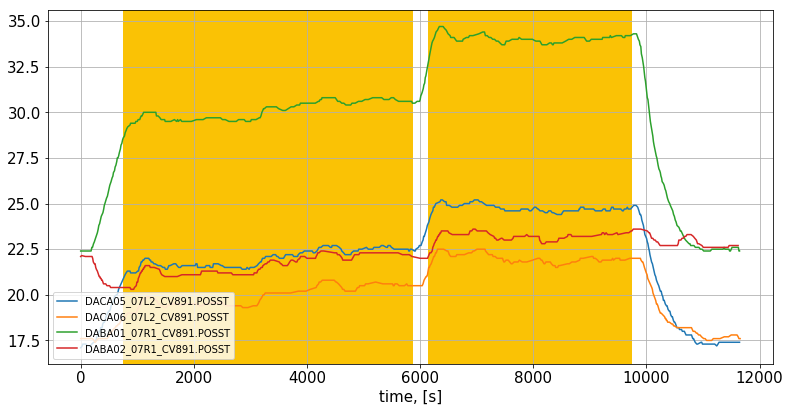

In [114]:
AssertionBuilder().with_signal(cv891_dfs) \
    .with_time_range(t_start=(plateau_start-i_meas_raw_df.index[0])/1e9, t_end=(plateau_end-i_meas_raw_df.index[0])/1e9) \
    .has_min_max_variation(variation_min_max=1)

- has_min_max_slope()

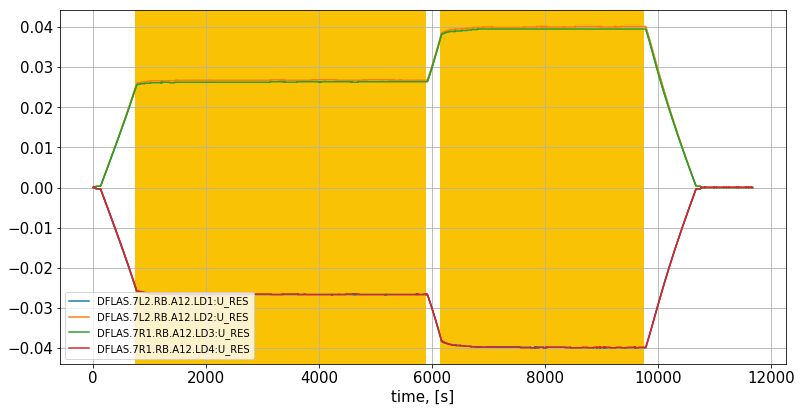

In [115]:
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder
from lhcsmapi.pyedsl.AssertionBuilder import AssertionBuilder
from lhcsmapi.analysis.busbar.BusbarResistanceAnalysis import BusbarResistanceAnalysis

t_start = '2014-12-13 09:12:41+01:00'
t_end = '2014-12-13 12:27:11+01:00'

u_res_dfs = QueryBuilder().with_nxcals(spark) \
    .with_duration(t_start=t_start, t_end=t_end) \
    .with_circuit_type('RB') \
    .with_metadata(circuit_name='RB.A12', system=['LEADS_EVEN', 'LEADS_ODD'], signal='U_RES') \
    .signal_query() \
    .synchronize_time() \
    .convert_index_to_sec() \
    .filter_median() \
    .dfs

i_meas_raw_df = QueryBuilder().with_nxcals(spark) \
    .with_duration(t_start=t_start, t_end=t_end) \
    .with_circuit_type('RB') \
    .with_metadata(circuit_name='RB.A12', system='PC', signal='I_MEAS') \
    .signal_query() \
    .dfs[0]

plateau_start, plateau_end = BusbarResistanceAnalysis.calculate_current_plateau_start_end([i_meas_raw_df], i_meas_threshold=500)

AssertionBuilder().with_signal(u_res_dfs) \
    .with_time_range(t_start=(plateau_start-i_meas_raw_df.index[0])/1e9, t_end=(plateau_end-i_meas_raw_df.index[0])/1e9) \
    .has_min_max_slope(slope_min=-2, slope_max=2)

In the case below, the allowed slope is too tight and the assertion fails 

The drift of DFLAS.7L2.RB.A12.LD1:U_RES is -0.155 mV/h for constant current from 747.096686592 to 5882.761325312 s
The drift of DFLAS.7L2.RB.A12.LD1:U_RES is -0.786 mV/h for constant current from 6140.794719232 to 9740.260548864 s
The drift of DFLAS.7L2.RB.A12.LD2:U_RES is 0.197 mV/h for constant current from 747.096686592 to 5882.761325312 s
The drift of DFLAS.7L2.RB.A12.LD2:U_RES is 0.760 mV/h for constant current from 6140.794719232 to 9740.260548864 s
The drift of DFLAS.7R1.RB.A12.LD3:U_RES is 0.238 mV/h for constant current from 747.096686592 to 5882.761325312 s
The drift of DFLAS.7R1.RB.A12.LD3:U_RES is 0.541 mV/h for constant current from 6140.794719232 to 9740.260548864 s
The drift of DFLAS.7R1.RB.A12.LD4:U_RES is -0.230 mV/h for constant current from 747.096686592 to 5882.761325312 s
The drift of DFLAS.7R1.RB.A12.LD4:U_RES is -0.615 mV/h for constant current from 6140.794719232 to 9740.260548864 s


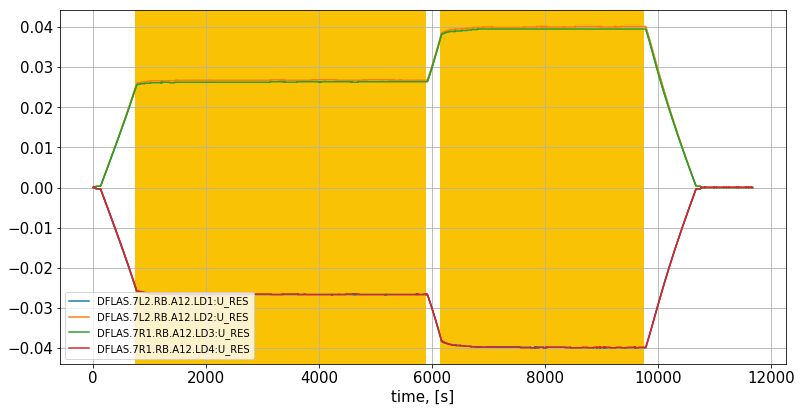

In [116]:
AssertionBuilder().with_signal(u_res_dfs) \
    .with_time_range(t_start=(plateau_start-i_meas_raw_df.index[0])/1e9, t_end=(plateau_end-i_meas_raw_df.index[0])/1e9) \
    .has_min_max_slope(slope_min=-2e-3, slope_max=2e-3)

## 3.5. FeatureBuilder()

<center>{SIGNALS}.(FEATURE_CALCULATION).{ASSERTION}</center>

e.g.  
```python
FeatureBuilder().with_signal(u_hds_dfs) \
                .calculate_features(features=['first', 'last20mean', 'tau_charge'], index=1544622149599000000)
```
Supported functions are: 

```python
['first', 'first20mean', 'last', 'last20mean', 'max', 'min', 'median', 'std', 'mean', 'tau_charge', 'tau_energy', 'tau_lin_reg', 'tau_exp_fit']
```
For example, to calculate initial voltage, final mean voltage based on the last 20 points, and the characteristic time of the pseudo-exponential decay for a quench heater voltage.
<img src = "https://gitlab.cern.ch/LHCData/lhc-sm-api/raw/master/figures/QH.png">

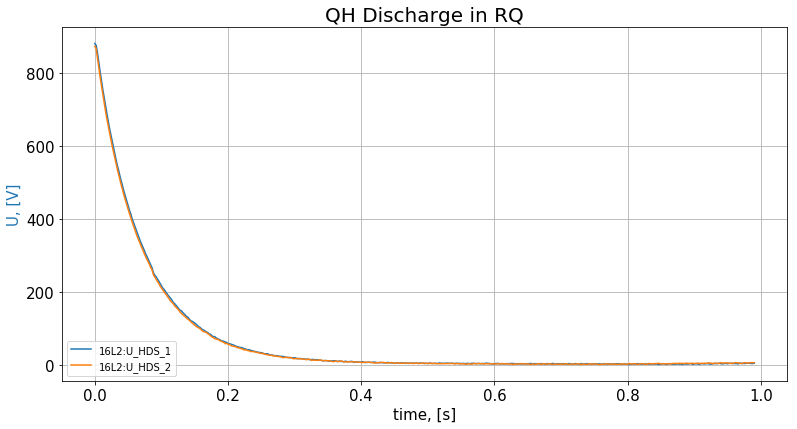

16L2:U_HDS_1:first  16L2:U_HDS_1:last20mean  \
1544622149599000000            880.4621                 5.575086   

                     16L2:U_HDS_1:tau_charge  16L2:U_HDS_2:first  \
1544622149599000000                  0.07779            872.8354   

                     16L2:U_HDS_2:last20mean  16L2:U_HDS_2:tau_charge  
1544622149599000000                 6.734703                 0.076704

In [117]:
from lhcsmapi.pyedsl.PlotBuilder import PlotBuilder
from lhcsmapi.pyedsl.QueryBuilder import QueryBuilder
from lhcsmapi.pyedsl.FeatureBuilder import FeatureBuilder
import matplotlib.pyplot as plt

timestamp = 1544622149599000000

u_hds_dfs = QueryBuilder().with_pm() \
    .with_timestamp(timestamp) \
    .with_circuit_type('RQ') \
    .with_metadata(circuit_name='RQD.A12', system='QH', signal='U_HDS', source='16L2', wildcard={'CELL': '16L2'}) \
    .signal_query()\
    .synchronize_time(timestamp)\
    .convert_index_to_sec().dfs

PlotBuilder().with_signal(u_hds_dfs, title='QH Discharge in RQ', grid=True) \
    .with_ylabel(ylabel='U, [V]') \
    .with_xlabel(xlabel='time, [s]') \
    .plot()

FeatureBuilder().with_signal(u_hds_dfs) \
                .calculate_features(features=['first', 'last20mean', 'tau_charge'], index=1544622149599000000)

## 4. Analysis
An analysis of a signal consists of two steps: signal query and processing. We follow a circuit-oriented approach; as a contrary to system-oriented approach. Following this approach we provide classes capable of querying (CircuitQuery class hierarchy) and processing (CircuitAnalysis class hierarchy) for each circuit. In case a system is the same across all circuit types (e.g., power converter, current leads), the common methods are stored in super classes. Custom processing of a system (e.g., PIC) or systems present only in some circuits (e.g., energy extraction) are handled in classes specific to each concerned circuit. In other words, common systems are treated in the same way and differences are treated for each circuit separately. This structure reflects the actual circuit arrangement. So far, the main dipole and quadrupole circuits were treated this way. This template will be applied to the remaining circuits.
<img src="https://sigmon.web.cern.ch/sites/sigmon.web.cern.ch/files/inline-images/analysis-query-class-diagram.png">

All queries rely on the pyeDSL sub-package while the processing methods use the pyeDSL for repetitive tasks supported by dedicated methods for custom analyses. We apply a factory design pattern to instantiate an object matching the circuit type. The Analysis sub-package is used for both HWC and operation notebooks as well as signal monitoring applications.

## 5. GUI

- Browser for FPA
<img src="https://sigmon.web.cern.ch/sites/sigmon.web.cern.ch/files/inline-images/swan-rb-fpa-analysis-fgc-pm-browser.png">

- Browser for HWC
<img src="https://sigmon.web.cern.ch/sites/sigmon.web.cern.ch/files/inline-images/swan-hwc-browser.png">
